# Predicting Patient No-Show to their Medical Appointments using a Machine Learning Model
---
## **Stage 1:** Business Understanding
### Background
- This dataset found in Kaggle, has Brazil data regarding patients, their medical appointments and whether they showed up or not.
- Patients not showing up to a medical appointment is lost opportunity for medical practices. They represent wasted capacity, staff time and material. 
- The dataset is designed for the development of a Machine Learning Model to predict when patients show up to their appointment.
- Due to the nature of the problem, I need to use machine learning models for supervised learning, specifically models classification problems.
- In this case, the company should bo more interested in predicting the the patient is NOT going to attend their medical appointment so that we can try to do something about it to prevent the opportunity loss. Therefore, I will invert the response variable.
- Also, due to the nature of the problem, the most important metric to look out for is Recall. It is more important to catch the patients that are not going to attend their appointment that it is to focus on making every prediction correctly (accuracy) or than making sure all positive predictions are actually positive (precision).

### Dataset - Data Dictionary
- Input variables:
    - PatientId: Identification number of the patient.
    - AppointmentId: Identification Number of the appointment.
    - Gender: [M,F] Patient gender.
    - ScheduledDay: Date in which the appointment was scheduled.
    - AppointmentDay: Date in which the appointment was scheduled to be. 
    - Age: Patient's age.
    - Neighborhood: Neighborhood where the service site is.
    - Scholarship: [0,1] Whether the patient had government aid through the Bolsa Familia Program (a federal program in Brazil that aids lower income families).
    - Hipertension: [0,1] Whether the patient suffers from chronic hypertension.
    - Diabetes: [0,1] Whteher the patient has chronic diabetes.
    - Alcoholism: [0,1] Whether the patient has diagnosed alcoholism.
    - Handicap: [0,1] Whether the patient is handicapped.
    - SMS_received: [0,1] Whether the patient recieved one or more SMS messages.
    - Date.diff: Número de días entre ScheduledDay y AppointmentDay.
- Response variable:
    - Showed_up: [0,1] Whether the patient showed up for the appointment. This value will be inverted to denote when a patient **did not attend** their appointment.


---

## **Stage 2:** Understanding the data
This stage is meant for Exploratory Data Analysis (EDA)

In [9]:
# Including all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Reding the data files
df_noshow = pd.read_csv('healthcare_noshows.csv', parse_dates=['ScheduledDay', 'AppointmentDay'])
df_noshow.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


### Univariate analysis
- What is the dimensionality of the dataset?
- What data types do the variables have?
- Are there any missing values?
- What are the central tendency measures of each variable of the dataset?
- What cardinality do the categorical variables have?

In [3]:
df_noshow.shape

(106987, 15)

In [4]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       106987 non-null  float64       
 1   AppointmentID   106987 non-null  int64         
 2   Gender          106987 non-null  object        
 3   ScheduledDay    106987 non-null  datetime64[ns]
 4   AppointmentDay  106987 non-null  datetime64[ns]
 5   Age             106987 non-null  int64         
 6   Neighbourhood   106987 non-null  object        
 7   Scholarship     106987 non-null  bool          
 8   Hipertension    106987 non-null  bool          
 9   Diabetes        106987 non-null  bool          
 10  Alcoholism      106987 non-null  bool          
 11  Handcap         106987 non-null  bool          
 12  SMS_received    106987 non-null  bool          
 13  Showed_up       106987 non-null  bool          
 14  Date.diff       106987 non-null  int

In [5]:
df_noshow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

In [6]:
df_noshow.nunique()

PatientId          60270
AppointmentID     106987
Gender                 2
ScheduledDay         110
AppointmentDay        27
Age                  102
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                2
SMS_received           2
Showed_up              2
Date.diff            131
dtype: int64

In [7]:
num_cols = df_noshow.select_dtypes(include=[np.number, np.datetime64]).columns.tolist()
cat_cols = df_noshow.select_dtypes(exclude=[np.number, np.datetime64]).columns.tolist()

print(df_noshow.columns)
print(num_cols)
print(cat_cols)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')
['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Age', 'Date.diff']
['Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up']


In [8]:
df_noshow.loc[:,num_cols].describe().T

,count,mean,min,25%,50%,75%,max,std
PatientId,106987.0,147281371616732.75,39217.84439,4173522744033.0,31724627165447.0,94335995568769.0,999981631772427.0,255826674206772.78125
AppointmentID,106987.0,5675434.199716,5030230.0,5640489.5,5680744.0,5725634.5,5790484.0,71332.741342
ScheduledDay,106987,2016-05-08 21:18:53.330217728,2015-11-10 00:00:00,2016-04-29 00:00:00,2016-05-10 00:00:00,2016-05-20 00:00:00,2016-06-08 00:00:00,NaN
AppointmentDay,106987,2016-05-19 01:18:58.041070336,2016-04-29 00:00:00,2016-05-09 00:00:00,2016-05-18 00:00:00,2016-05-31 00:00:00,2016-06-08 00:00:00,NaN
Age,106987.0,38.316085,1.0,19.0,38.0,56.0,115.0,22.466214
Date.diff,106987.0,10.166721,-6.0,0.0,4.0,14.0,179.0,15.263508


In [9]:
df_noshow.loc[:,cat_cols].describe(exclude=np.datetime64).T

,count,unique,top,freq
Gender,106987,2,F,70118
Neighbourhood,106987,81,JARDIM CAMBURI,7586
Scholarship,106987,2,False,96178
Hipertension,106987,2,False,85186
Diabetes,106987,2,False,99044
Alcoholism,106987,2,False,103627
Handcap,106987,2,False,104747
SMS_received,106987,2,False,72402
Showed_up,106987,2,True,85307


Insights:
* **Dataset dimensionality** 15 variables, 106,987 records
* **Variable data types** Strings, fechas y numéricos
* **Missing values** No hay valores faltantes
* **Central tendency measures in a dataframe above**
* **Categorical varaibles cardinality** Most variables are boolean (true, false). Neighborhood has a higher cardinality with 81 different values.

Also, there are some values in Date.diff that are negative. I will check for these records since it is not possible to schedule an appointment after it happened. We might need to delete or correct them.

Explore the dataset through graphs and visualizations.

* Are there atypical values?
* Are there any skewed distributions?
* How is data distributed against different categories?
* Is there correlation between dependent and independet variables?
* Is the response variable unbalanced?

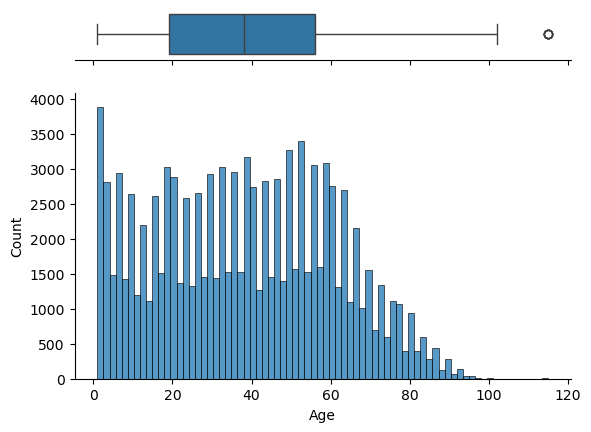

In [10]:
# Defining a function that plots a two part graph with a box plot and a histogram

def box_hist_plot(series, hue=None):
    '''Function to plot a combined histogram and box plot charts sharing the x axis.
    
    Parameters
    ----------
    series : pd.Series
        The pandas series that will be graphed.'''
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(x=series, ax=ax_box)
    sns.histplot(x=series, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)


box_hist_plot(df_noshow['Age'])

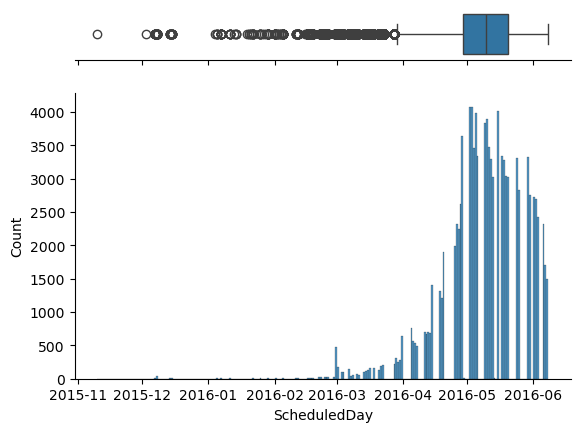

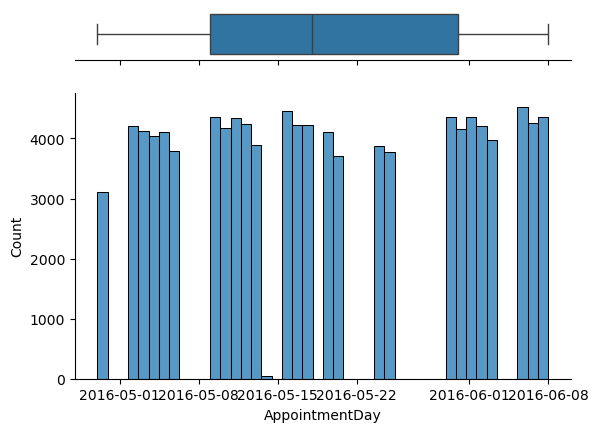

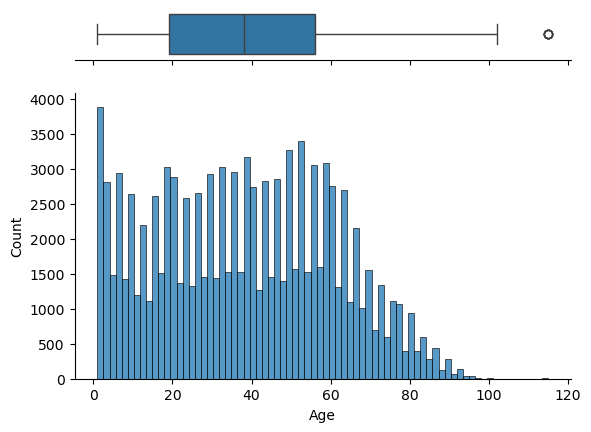

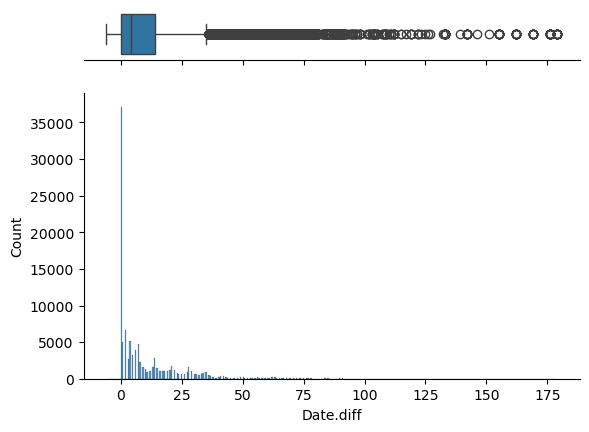

In [11]:
# Detecting outliers and skewed distributions with boxplots and histograms

# Delete IDs
try:
    num_cols.remove('PatientId')
    num_cols.remove('AppointmentID')
except:
    pass

for col in num_cols:
    box_hist_plot(df_noshow[col])

In [12]:
# Group neighbourhoods outside the top 10 (based on count of appointments)
top10_neighbourhoods = df_noshow['Neighbourhood'].value_counts()[:25].index
df_noshow['Neighbourhood T10'] = df_noshow['Neighbourhood'].apply(lambda x: x if x in top10_neighbourhoods else 'Other')

df_noshow['Neighbourhood T10'].value_counts() / df_noshow['Neighbourhood T10'].value_counts().sum()
# Due to the high number of different neighbourhoods, a separate graph will be used

Neighbourhood T10
Other                  0.327862
JARDIM CAMBURI         0.070906
MARIA ORTIZ            0.051997
RESISTÊNCIA            0.039584
JARDIM DA PENHA        0.035995
ITARARÉ                0.031892
CENTRO                 0.030677
SANTA MARTHA           0.028424
TABUAZEIRO             0.028218
JESUS DE NAZARETH      0.025414
BONFIM                 0.025237
SANTO ANTÔNIO          0.024984
CARATOÍRA              0.023265
SANTO ANDRÉ            0.022975
JABOUR                 0.022395
SÃO PEDRO              0.021928
ILHA DO PRÍNCIPE       0.020769
ANDORINHAS             0.020517
DA PENHA               0.020143
NOVA PALESTINA         0.020068
ROMÃO                  0.019872
GURIGICA               0.017806
SÃO JOSÉ               0.017460
MARUÍPE                0.017432
BELA VISTA             0.017142
ILHA DE SANTA MARIA    0.017039
Name: count, dtype: float64

In [13]:
cat_cols_grid_analysis = cat_cols.copy()
cat_cols_grid_analysis.remove('Neighbourhood')
print(cat_cols_grid_analysis)

['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up']


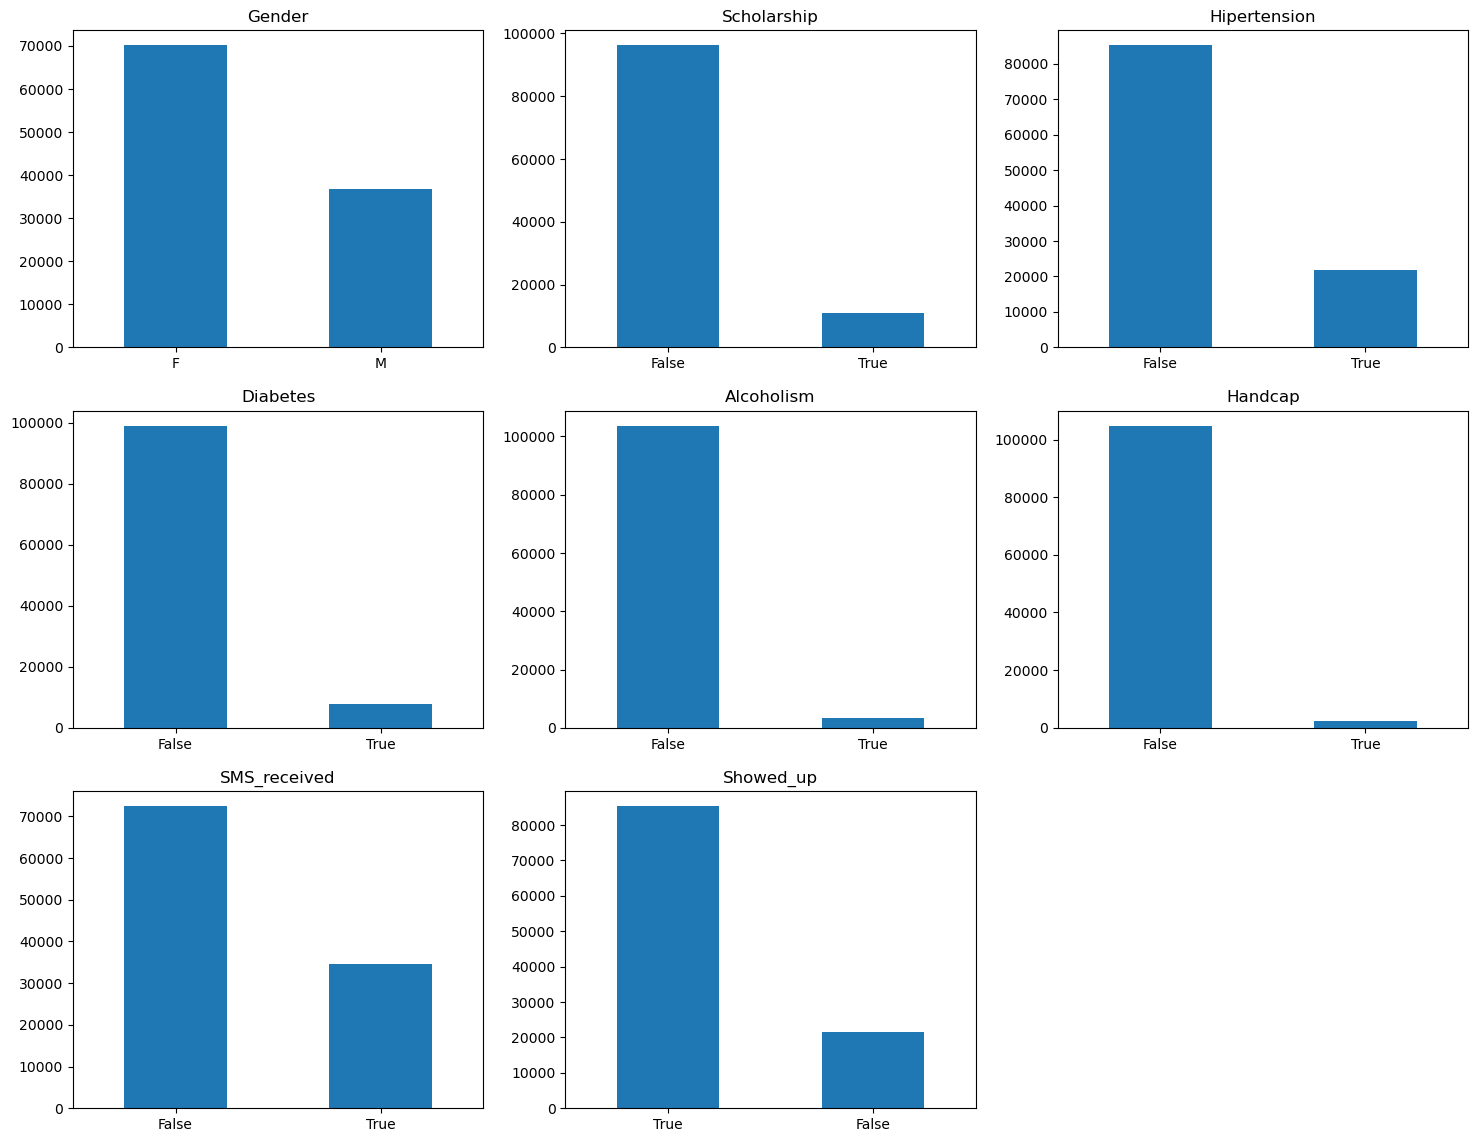

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,14))
axes = axes.ravel()


for col, ax in zip(cat_cols_grid_analysis, axes):
    value_counts = df_noshow[col].value_counts()[:10].plot(kind='bar', ax=ax)
    ax.set(title=f'{col}', xlabel=None, ylabel=None)
    ax.tick_params(axis='x', rotation=0)

fig.delaxes(axes[-1])


In [15]:
# Analyze Neighborhood variable using a treemap
import plotly.express as px
import plotly.graph_objects as go

pivot = df_noshow.pivot_table(values='AppointmentID', index='Neighbourhood', aggfunc='count').reset_index()

fig = px.treemap(data_frame=pivot, 
                 path=[px.Constant('All Neigh'),'Neighbourhood'],
                 values='AppointmentID', 
                 title='Count of Visits by Neighbourhood',
                 color='AppointmentID',
                 color_continuous_scale=px.colors.sequential.Blues_r)

fig.show()

## Bivariate analysis

In [16]:
def box_hist_plot(series, hue=None):
    '''Function to plot a combined histogram and box plot charts sharing the x axis.
    
    Parameters
    ----------
    series : pd.Series
        The pandas series that will be graphed.'''
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(x=series, ax=ax_box)
    sns.histplot(x=series, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)



In [17]:
# Modify function to be able to include two variables
def box_hist_plot(data, variable, hue=None):
    '''Function to plot a combined histogram and box plot charts sharing the x axis.
    
    Parameters
    ----------
    series : pd.Series
        The pandas series that will be graphed.'''
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                        gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(data=data, x=variable, ax=ax_box, hue=hue)
    sns.histplot(data=data, x=variable, ax=ax_hist, hue=hue)

    handles, labels = ax_hist.get_legend_handles_labels()
    f.legend(handles, labels, loc='upper left')

    ax_box.get_legend().remove()

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)




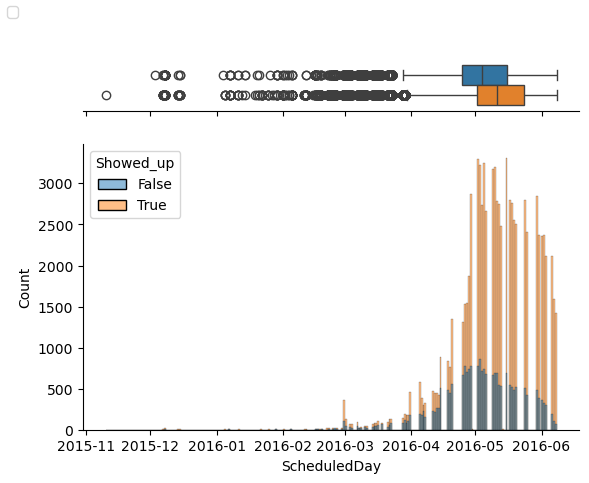

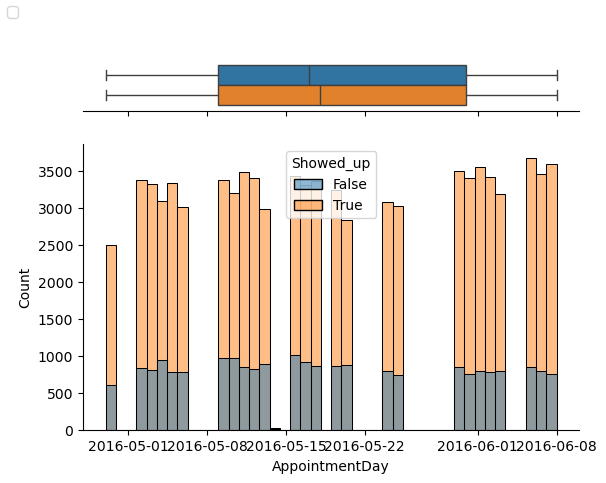

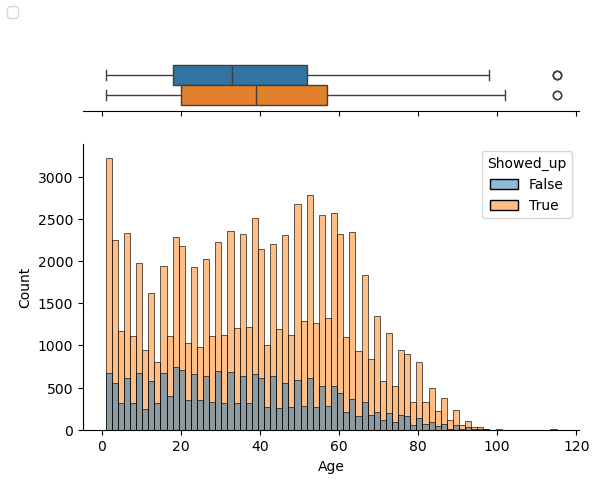

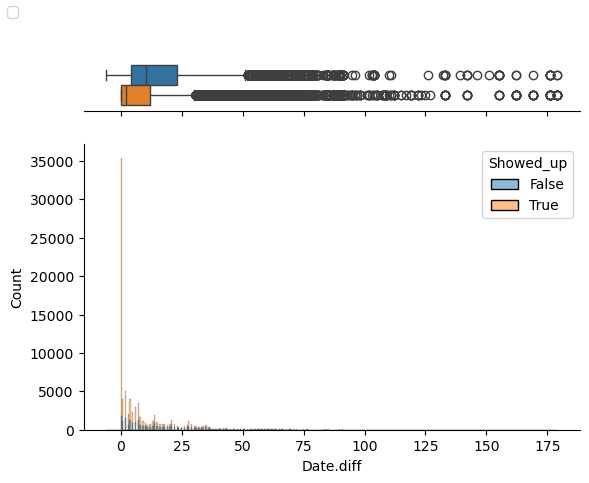

In [18]:
# Bivariate exploration of numeric variables
for col in num_cols:
    box_hist_plot(data=df_noshow, variable=col, hue='Showed_up')

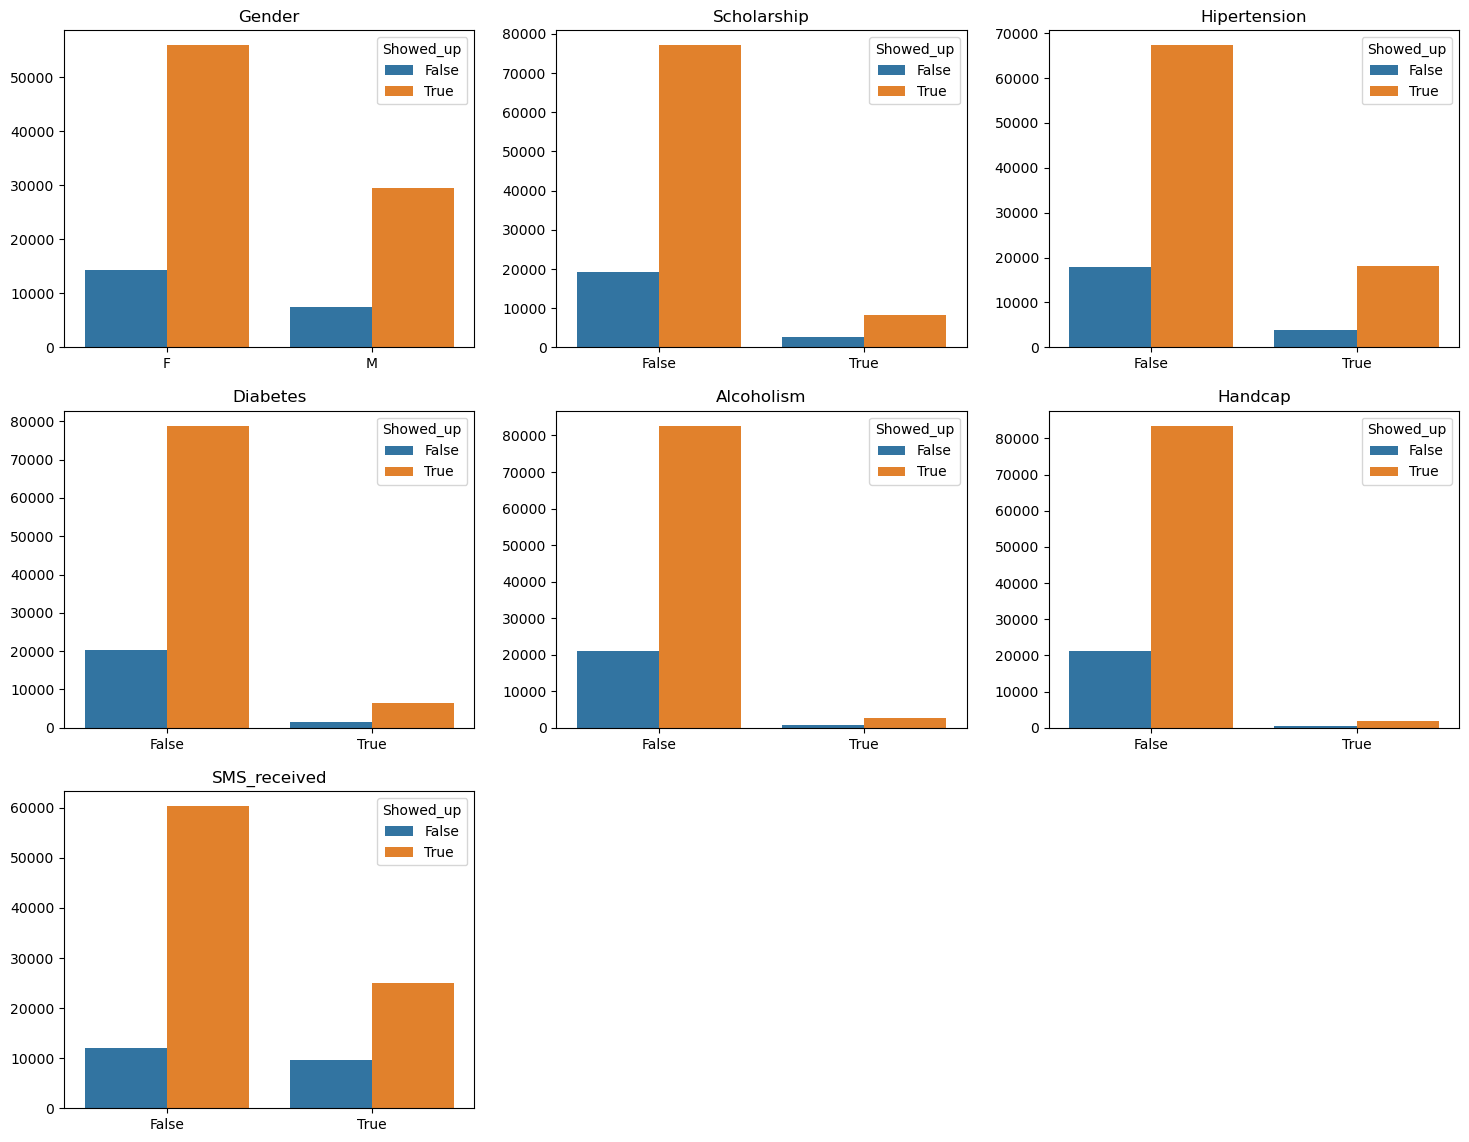

In [19]:
# Bivariate exploration of categorical variables

# Remove Showed_up from the graphs to plot
try:
    cat_cols_grid_analysis.remove('Showed_up')
except ValueError:
    pass

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,14))
axes = axes.ravel()


for col, ax in zip(cat_cols_grid_analysis, axes):
    pivot = df_noshow.value_counts(subset=[col,'Showed_up']).reset_index()
    sns.barplot(data=pivot, x=col, y='count', hue='Showed_up', ax=ax)
    ax.set(title=f'{col}', xlabel=None, ylabel=None)
    ax.tick_params(axis='x', rotation=0)

fig.delaxes(axes[-2])
fig.delaxes(axes[-1])

In [20]:
pivot = df_noshow.pivot_table(values='AppointmentID', index=['Neighbourhood','Showed_up'], aggfunc='count').reset_index()

pivot

fig = px.treemap(data_frame=pivot, 
                 path=[px.Constant('All Neigh'),'Neighbourhood','Showed_up'],
                 values='AppointmentID', 
                 title='Count of Visits by Neighbourhood',
                 color='AppointmentID',
                 color_continuous_scale=px.colors.sequential.Blues_r)

fig.show()

<Axes: >

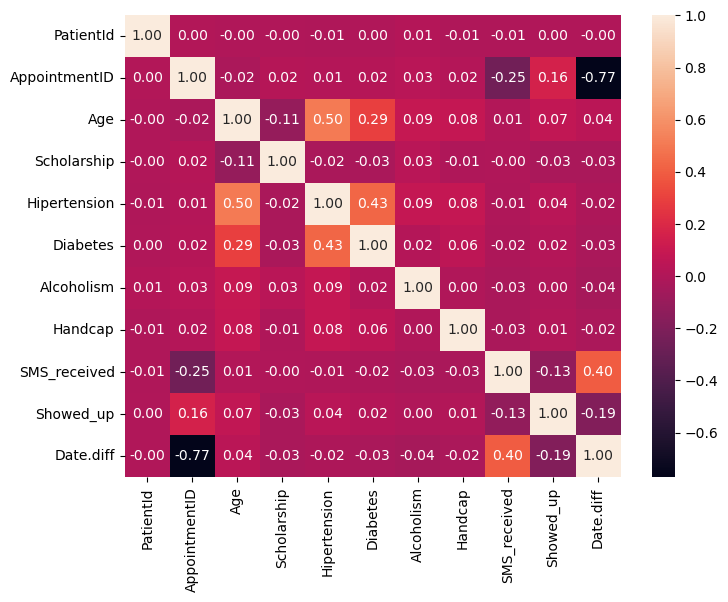

In [21]:
# Explore correlation between variables
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_noshow.corr(numeric_only=True), annot=True, fmt='.2f')

In [22]:
df_noshow['AppointmentDay'].value_counts(sort=False)

AppointmentDay
2016-04-29    3104
2016-05-03    4129
2016-05-10    4177
2016-05-17    4227
2016-05-24    3876
2016-05-31    4158
2016-05-02    4214
2016-05-30    4360
2016-05-16    4449
2016-05-04    4048
2016-05-19    4109
2016-05-12    4233
2016-05-06    3791
2016-05-20    3707
2016-05-05    4113
2016-05-13    3885
2016-05-09    4352
2016-05-25    3768
2016-05-11    4347
2016-05-18    4220
2016-05-14      39
2016-06-02    4204
2016-06-03    3978
2016-06-06    4528
2016-06-07    4264
2016-06-01    4351
2016-06-08    4356
Name: count, dtype: int64

**Insights:**
- There are outliers in both the date the appointment schedule date and the appointment date. Part of this is because the dataset only includes a month or so of appointments data.
- The response variable has an 80% - 20% unbalance.
- There is a gender unbalance in the dataset. 70% are women and just 30% men. However gender does not have a noticeable correlation with the response variable.
- AppointmentDay reveals that the clinic most likely works Monday to Friday since the appointment dates are grouped in periods of 5 days.
- ScheduledDay and Date.diff are highly skewed, most people schedule schedule their appointments the same day or a few days in advance and only a few schedule their appointments a month or more in advance.
- It seems that, other than when the patients schedule their appointment for the same day, there is no relation between the days in advance when the patient schedules their appointment.
- There seems to be a relation between choronic conditions and the whether the patients shows up for their appointment.
- There also seems to be a relation betweeh the Scholarship variable and the response variable.
- The heatmap reveals that there is a significant negative correlation between AppointmentID and Date.diff. This is of no consecuence since AppointmentID does not provide any information being an identification number. The correlation is probably the result of an incremental ID genertion.
- Other notable correlations are between the variables of age and hypertension and between hypertension and diabetes. These are expected since hypertension commonly develops as the person gets older and, hypertension is among the conditions that follow diabetes.

---

## Stage 3: Preparing the dataset
In this stage, the dataset is transformed to make it suitable for machine learning. Transformation processes may include handling missing values and outliers, feature engineering, binning, encoding, scaling and transformations.

For this project these are the steps I will follow:
1. Reverse response variable
2. Given that there are 6 appointment that were scheduled after the appointment happened, I'll delete these records on the basis that there is no information that allows me to amend the error and that 6 records are not significant when the dataset has over 100,000 records.
3. Bin the chronic conditions into one single chronic variable.
4. Make a week day variable.
5. Make a holiday variable.
6. Bin Neighbourhoods based on the Pareto principle to group all less frequented neighborhoods into one single "Other" category.
7. Bin the date.diff variable into same day, within 7 days from the appointment, within 30 days from the appointment and more than 30 days from the appointment.
8. Do one-hot encoding to categorical variables.
    - I decided on one-hot encoding since none of the categorical variables follow are ordinal.


In [23]:
# Reverse response variable
df_noshow['no_show'] = df_noshow['Showed_up'].apply(lambda x: 0 if x else 1)
df_noshow.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff,Neighbourhood T10,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0,JARDIM DA PENHA,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0,JARDIM DA PENHA,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0,Other,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0,Other,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0,JARDIM DA PENHA,0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,True,2,Other,0
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,False,2,Other,1
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,False,2,Other,1
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,False,False,False,False,False,False,True,0,ANDORINHAS,0
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,True,2,Other,0


In [24]:
# Delete outliers (where the appointment was scheduled after it happened)
df_noshow = df_noshow.drop(df_noshow[df_noshow['ScheduledDay'] > df_noshow['AppointmentDay']].index)

# Delete outliers where Date.diff is cero.
# A proposed solution is to contact patients with potential no show ahead of time, same day appointments would not be actionable 
df_noshow = df_noshow.drop(df_noshow[df_noshow['Date.diff'] == 0].index)

print(df_noshow.shape)

(69828, 17)


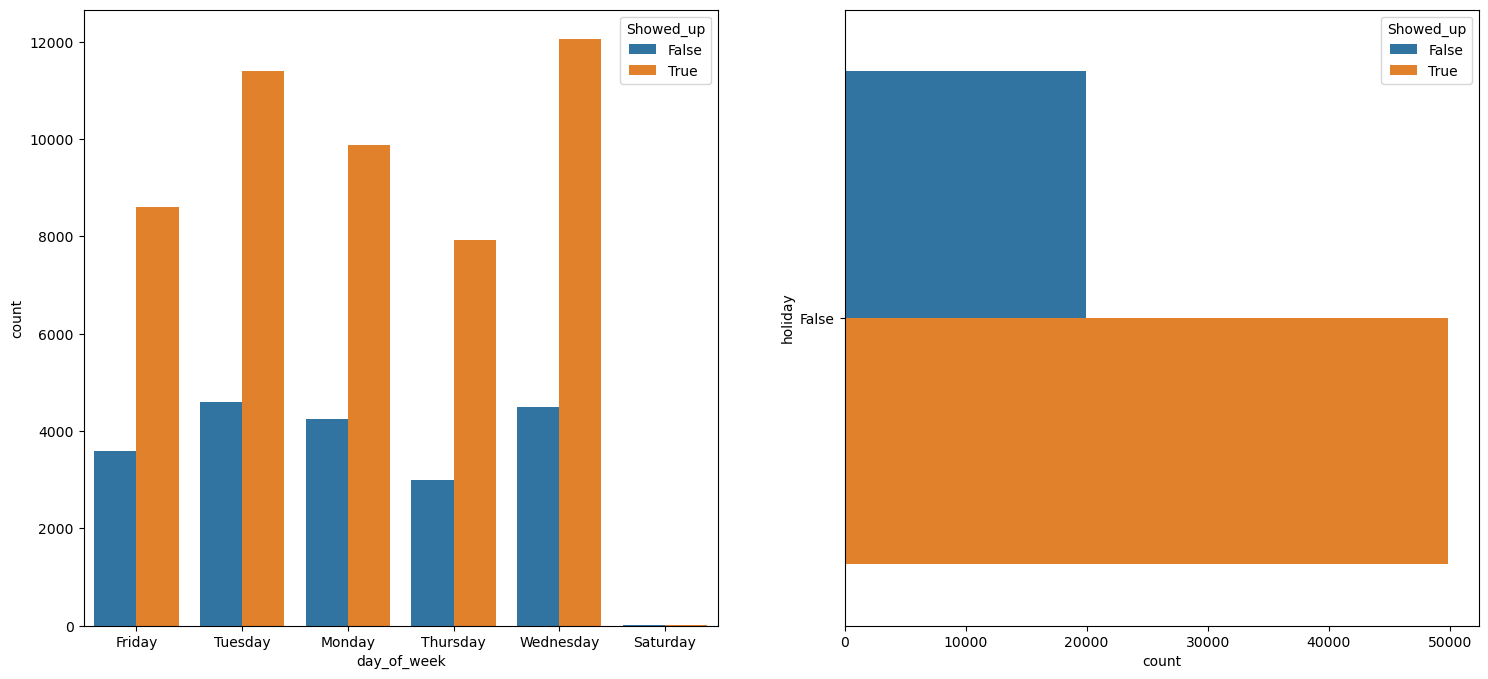

In [25]:
import holidays

holidays_br = holidays.BR()

# Create new features based on the appointment date
df_noshow['day_of_week'] = df_noshow['AppointmentDay'].dt.day_name()
df_noshow['holiday'] = df_noshow['AppointmentDay'].apply(lambda x: x in holidays_br)

# Visualize new features
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(data=df_noshow, x='day_of_week', hue='Showed_up', ax=ax[0])
sns.countplot(data=df_noshow, y='holiday', hue='Showed_up', ax=ax[1])
plt.show()

In [26]:
# Binning patients based on age
def age_categorization(age):
    if age < 1:
        return 'new born'
    elif age < 13:
        return 'infant'
    elif age < 20:
        return 'teen'
    elif age < 40:
        return 'young adult'
    elif age < 65:
        return 'adult'
    else:
        return 'elder'

df_noshow['age_category'] = df_noshow['Age'].apply(lambda x: age_categorization(x))
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff,Neighbourhood T10,no_show,day_of_week,holiday,age_category
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,True,2,Other,0,Friday,False,elder
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,False,2,Other,1,Friday,False,young adult
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,False,2,Other,1,Friday,False,young adult
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,True,2,Other,0,Friday,False,teen
10,7.345362e+14,5630213,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,False,False,False,False,False,False,True,2,NOVA PALESTINA,0,Friday,False,young adult


<Axes: xlabel='count', ylabel='age_category'>

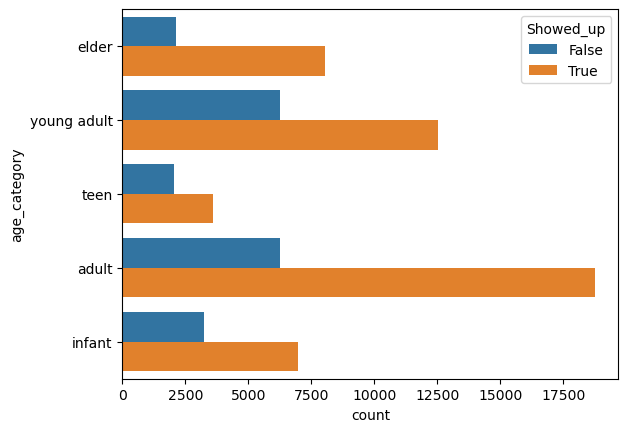

In [27]:
# Visualize new feature
sns.countplot(data=df_noshow, y='age_category', hue='Showed_up')

In [28]:
# Transforming categorical variables to one-hot encoding
df_categorical = df_noshow.loc[:, cat_cols]
df_categorical.head()

for column in ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap','SMS_received']:
    df_categorical[column] = df_categorical[column].apply(lambda x: 1 if x else 0)

df_categorical_ohe = pd.get_dummies(data=df_categorical, drop_first=True, dtype=int)
df_categorical_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69828 entries, 5 to 106986
Data columns (total 87 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Scholarship                                69828 non-null  int64
 1   Hipertension                               69828 non-null  int64
 2   Diabetes                                   69828 non-null  int64
 3   Alcoholism                                 69828 non-null  int64
 4   Handcap                                    69828 non-null  int64
 5   SMS_received                               69828 non-null  int64
 6   Showed_up                                  69828 non-null  bool 
 7   Gender_M                                   69828 non-null  int64
 8   Neighbourhood_ANDORINHAS                   69828 non-null  int64
 9   Neighbourhood_ANTÔNIO HONÓRIO              69828 non-null  int64
 10  Neighbourhood_ARIOVALDO FAVALESSA          69828 n

<Axes: xlabel='Date.diff', ylabel='Count'>

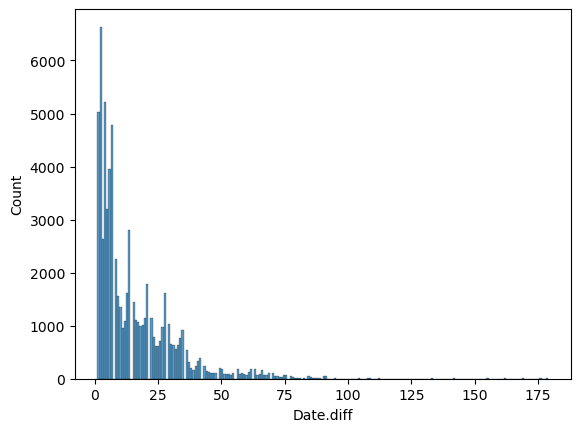

In [29]:
sns.histplot(df_noshow['Date.diff'])

<Axes: ylabel='Count'>

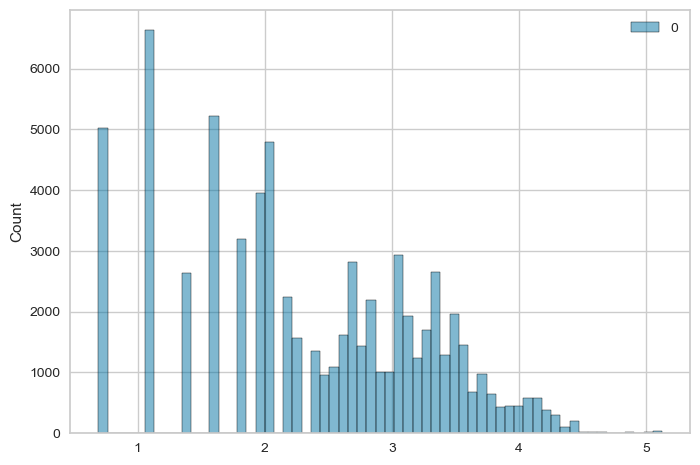

In [90]:
# Transform Date.diff to assess the skewness
from sklearn.preprocessing import PowerTransformer

df_numerical = df_noshow.loc[:,['Date.diff']]

transformer = PowerTransformer(method='yeo-johnson', standardize=False)
df_numerical_transformed = transformer.fit_transform(df_numerical)


# Visualize variable after transformation
sns.histplot(df_numerical_transformed)

In [31]:
# Scale Date.diff
# I used min-max scaler to limit the output between 0 and 1, this will play better with all the 0-1 categorical variables.
from sklearn.preprocessing import MinMaxScaler

# df_numerical = df_noshow.loc[:,['Date.diff']]
scaler = MinMaxScaler()
df_numerical_scaled = scaler.fit_transform(X=df_numerical_transformed)

df_numerical_scaled = pd.DataFrame(data=df_numerical_scaled, columns=df_numerical.columns)
df_numerical_scaled.describe()

,Date.diff
count,69828.000000
mean,0.374329
std,0.215122
min,0.000000
25%,0.205519
50%,0.360343
75%,0.545652
max,1.000000


<Axes: ylabel='Count'>

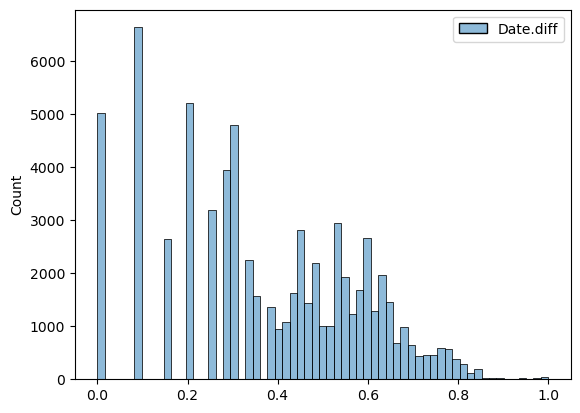

In [32]:
sns.histplot(df_numerical_scaled)

In [33]:
# Combine categorical, numberical and the response variable dataframes
model_dataset = pd.concat([df_categorical_ohe, df_numerical], axis=1)
model_dataset.drop(columns=['Showed_up'], inplace=True)
model_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69828 entries, 5 to 106986
Data columns (total 87 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Scholarship                                69828 non-null  int64
 1   Hipertension                               69828 non-null  int64
 2   Diabetes                                   69828 non-null  int64
 3   Alcoholism                                 69828 non-null  int64
 4   Handcap                                    69828 non-null  int64
 5   SMS_received                               69828 non-null  int64
 6   Gender_M                                   69828 non-null  int64
 7   Neighbourhood_ANDORINHAS                   69828 non-null  int64
 8   Neighbourhood_ANTÔNIO HONÓRIO              69828 non-null  int64
 9   Neighbourhood_ARIOVALDO FAVALESSA          69828 non-null  int64
 10  Neighbourhood_BARRO VERMELHO               69828 n

In [34]:
model_dataset.shape

(69828, 87)

In [35]:
# Assess imbalance problem using SMOTE
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X=model_dataset, y=df_noshow['no_show'])

print(X_resampled.shape)
print(y_resampled.shape)


(99788, 87)
(99788,)


<Axes: xlabel='count'>

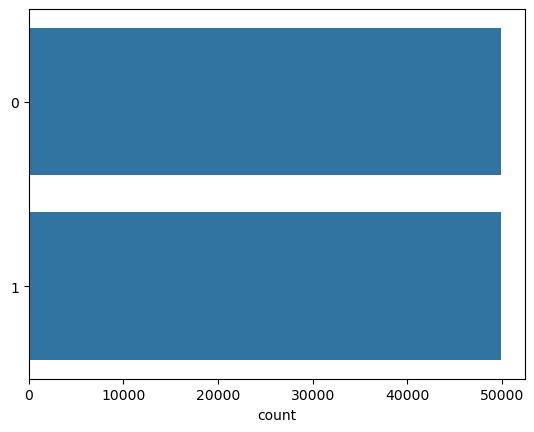

In [36]:
# Countplot parq revisar el resample de datos
sns.countplot(y=y_resampled.values)

**Insights:**
- Response variable was reversed with the aim of predicting when a patient will not attend their appointment. Identifying potential no-shows allows to take action like confirmation calls or backfills. 
- 6 records deleted on the basis that it is not logical to schedule an appointment after the appointment has happened.
- There are no visits in holidays in the timeframe the dataset encompasses. The holiday feature will be dropped since it does not provide any information for the model.
- I used one-hot encoding for the categorical variables.
- I used binning for the age and chronic illness variables.
- I used SMOTE to assess the imbalance of the response variable.

---

## Stage 4: Modeling and model evaluation
In this stage I will buidl different models using a variaty of algorithms. The steps I'll take are:
- Divide the dataset in training and testing.
- Try 3 different algorithms.
- Summarize the results in a comparative table.
- Select the model that best alligns with the business objectives (maximize recall)
- Tune the selected model to optimize performance.

In [37]:
# Train test split
from sklearn.model_selection import train_test_split

# Convert X and y to numpy arrays
X_resampled_copy = X_resampled.copy()
X_resampled = X_resampled.to_numpy()
y_resampled = y_resampled.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(79830, 87) (79830,) (19958, 87) (19958,)


In [38]:
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError, ROCAUC, ClassificationReport

def visual_score_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
  # Confusion Matrix
  cm_viz = ConfusionMatrix(
      model,
      classes=[0,1],
      ax=ax[0,0]
  )

  cm_viz.fit(X_train, y_train)
  cm_viz.score(X_test, y_test)

  # Class Prediction Error
  cpe_viz = ClassPredictionError(
      model,
      classes=[0,1],
      ax=ax[0,1]
  )

  cpe_viz.fit(X_train, y_train)
  cpe_viz.score(X_test, y_test)

  # ROC AUC
  rocauc_viz = ROCAUC(
      model,
      classes=[0,1],
      ax=ax[1,0]
  )

  rocauc_viz.fit(X_train, y_train)
  rocauc_viz.score(X_test, y_test)
  ax[1,0].legend()

  # Classification Report
  cr_viz = ClassificationReport(
      model,
      classes=[0,1],
      ax=ax[1,1]
  )

  cr_viz.fit(X_train, y_train)
  cr_viz.score(X_test, y_test)

  cm_viz.show()
  cpe_viz.show()
  cr_viz.show()
  rocauc_viz.show()



In [39]:
# Comparisson of different models (recall, precision, roc auc and train time)
from sklearn.metrics import precision_score, recall_score, roc_auc_score, make_scorer
from sklearn.model_selection import cross_validate

model_scores_comparison = pd.DataFrame(columns=['model','test_recall', 'train_recall','test_precision', 'train_precision','test_ROC AUC', 'train_ROC AUC'])
model_time_comparison = pd.DataFrame(columns=['model','fit_time'])

scoring = {'ROC AUC' : make_scorer(roc_auc_score), 
            'precision' : make_scorer(precision_score),
            'recall' : make_scorer(recall_score)}


def add_model_to_comparisson(model, model_name):
    '''
    '''
    scores = cross_validate(estimator=model,
                            X=X_train, 
                            y=y_train, 
                            cv=10, 
                            return_train_score=True, 
                            n_jobs=-1,
                            scoring=scoring)
        
    test_row_data = pd.DataFrame(data=[[model_name, scores['test_recall'].mean(), scores['train_recall'].mean(), scores['test_precision'].mean(), scores['train_precision'].mean(), scores['test_ROC AUC'].mean(), scores['train_ROC AUC'].mean()]],
                                columns=['model','test_recall', 'train_recall','test_precision', 'train_precision','test_ROC AUC', 'train_ROC AUC'])
    time_row_data = pd.DataFrame(data=[[model_name, scores['fit_time'].mean()]],
                                columns=['model', 'fit_time'])

    return test_row_data, time_row_data


In [40]:
from sklearn.tree import DecisionTreeClassifier

cross_validate(estimator=DecisionTreeClassifier(),
                            X=X_train, 
                            y=y_train, 
                            cv=10, 
                            return_train_score=True, 
                            n_jobs=-1,
                            scoring=scoring)['train_recall'].mean()

0.7438637437137061

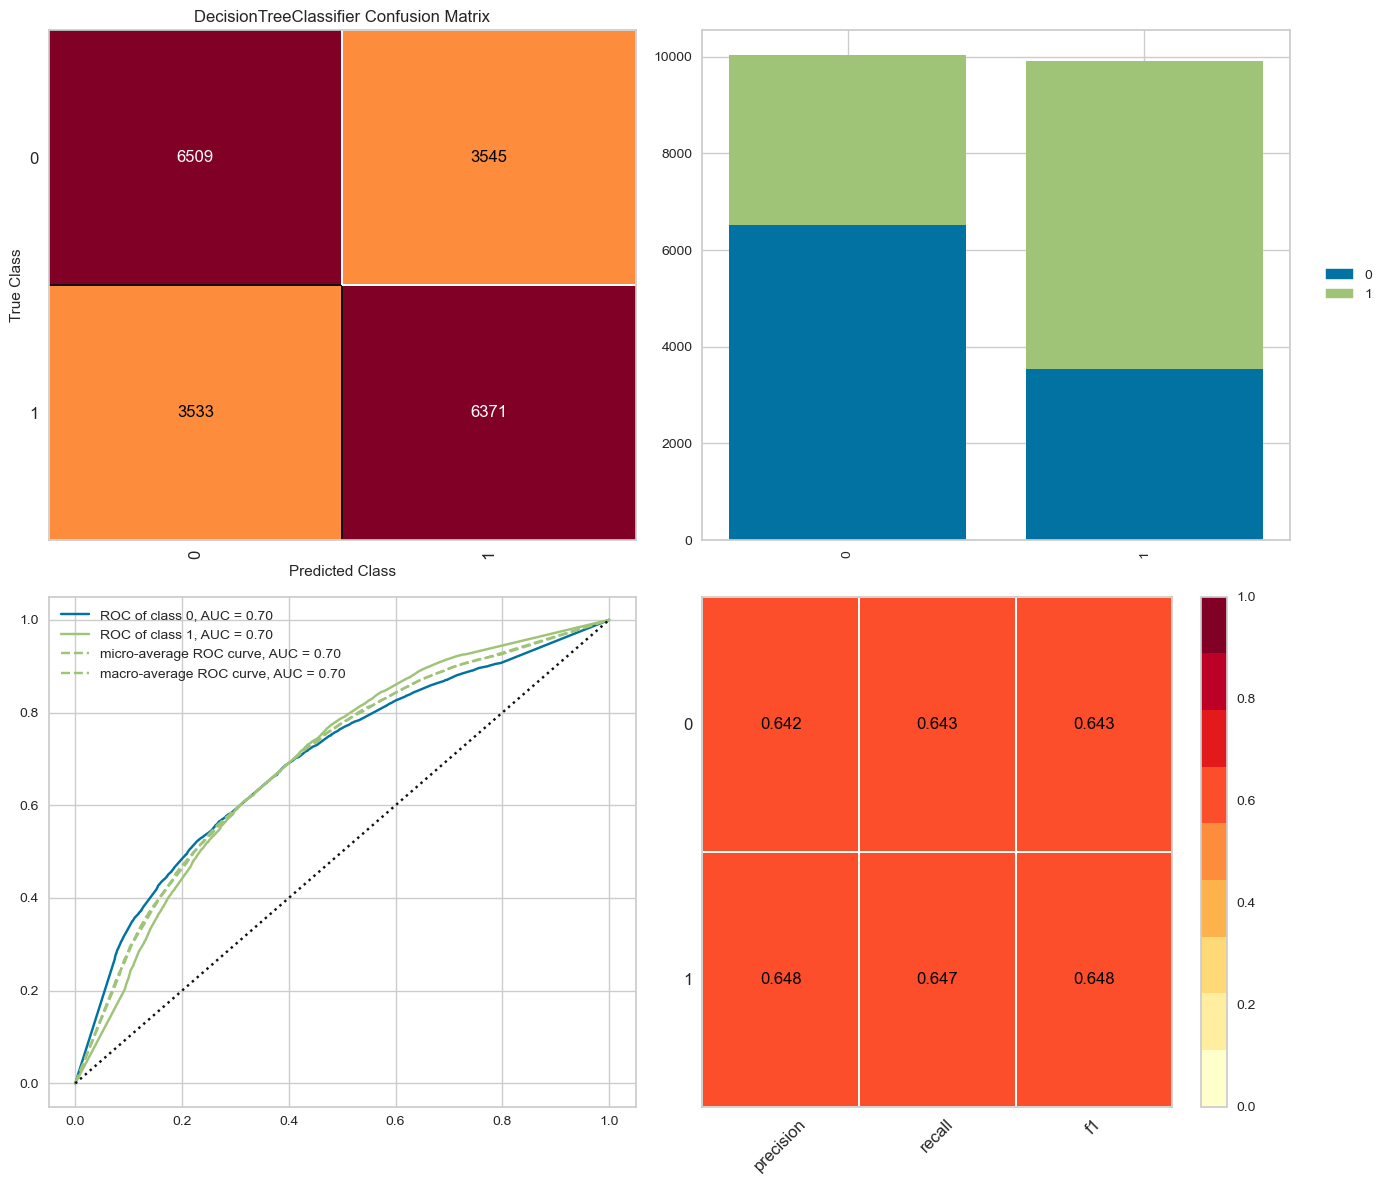

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

In [41]:
# Model #1 - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
scores, train_time = add_model_to_comparisson(dtree, 'Decision Tree')

model_scores_comparison = scores
model_time_comparison = train_time

visual_score_model(dtree)

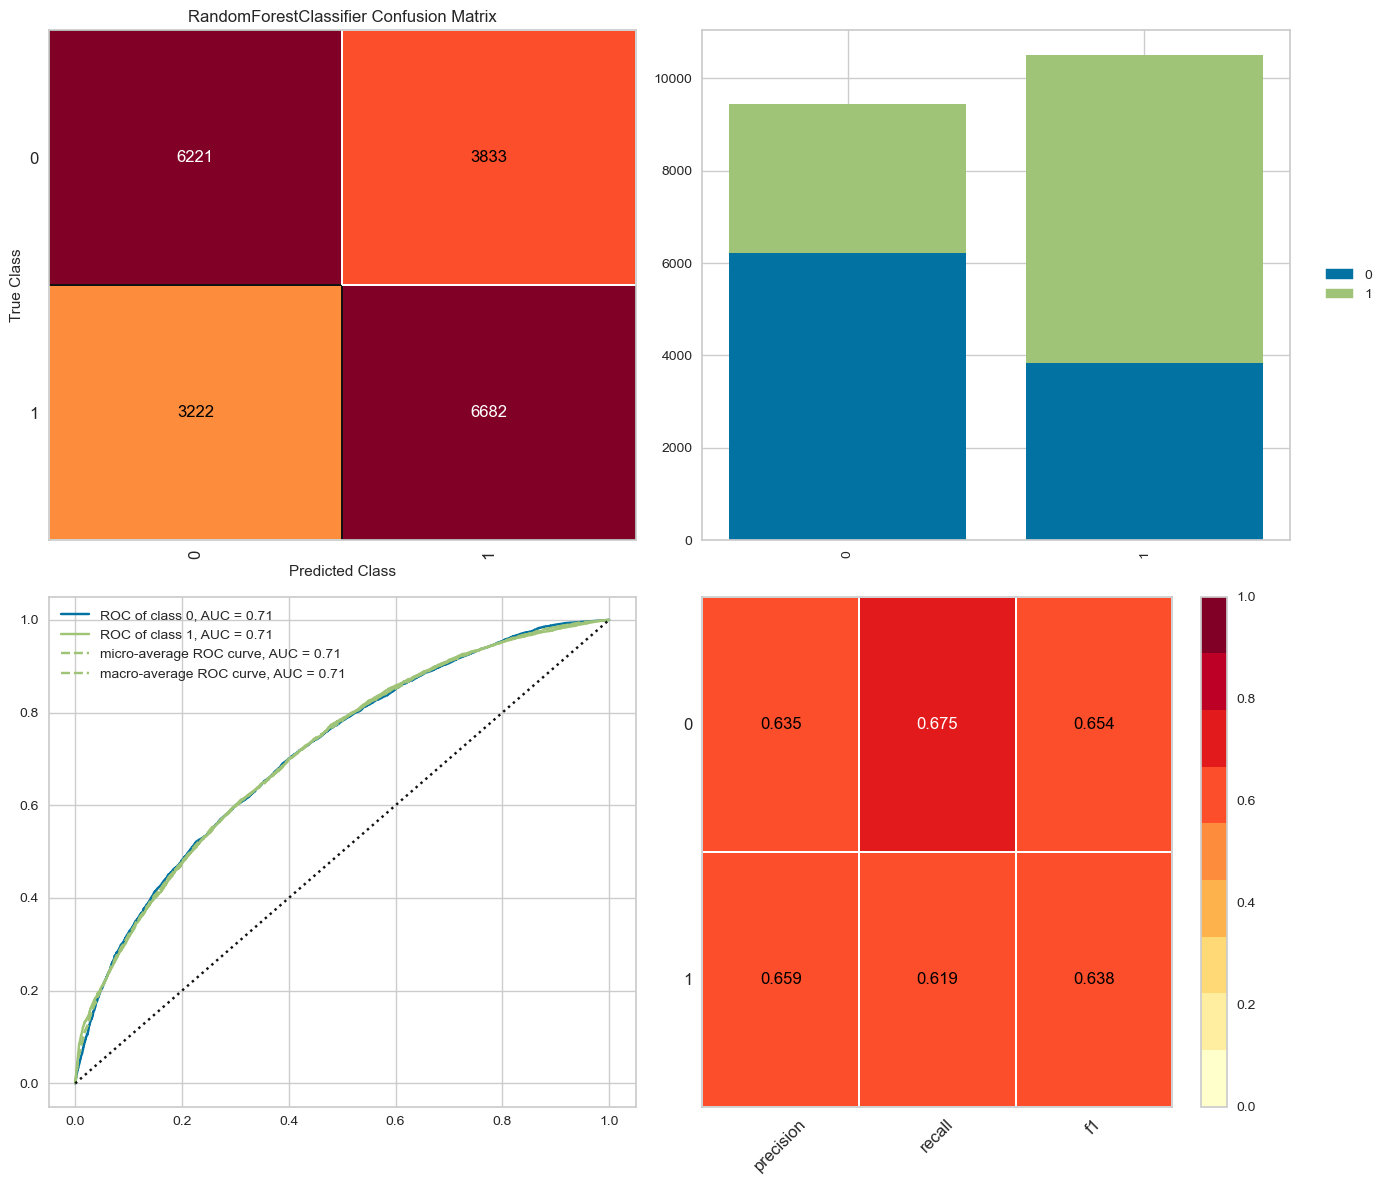

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

In [42]:
# Model #2 - Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=150,)
scores, train_time = add_model_to_comparisson(rfc, 'Random Forest')

model_scores_comparison = pd.concat(objs=[model_scores_comparison, scores])
model_time_comparison = pd.concat(objs=[model_time_comparison, train_time])

visual_score_model(rfc)


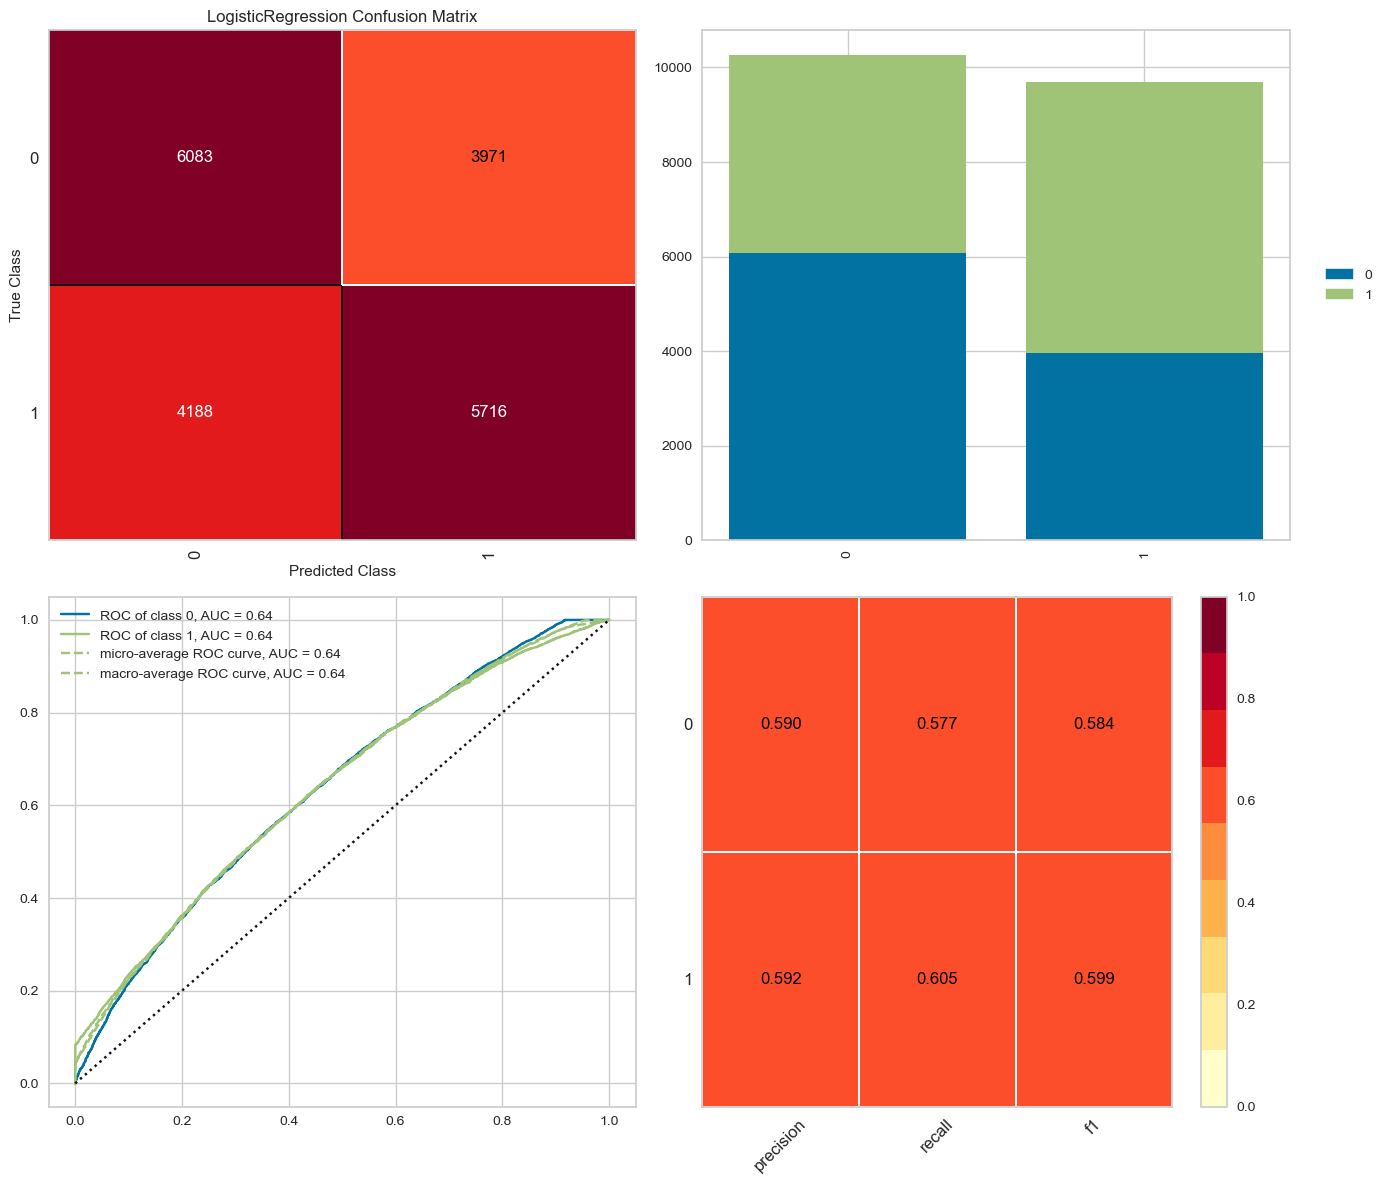

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

In [43]:
# Model #3 - Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
scores, train_time = add_model_to_comparisson(lr, 'Logistic Regression')

model_scores_comparison = pd.concat(objs=[model_scores_comparison, scores])
model_time_comparison = pd.concat(objs=[model_time_comparison, train_time])

visual_score_model(lr)

In [44]:
df_noshow.corr(numeric_only=True)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff,no_show,holiday
PatientId,1.000000,-0.002879,-0.004572,-0.001395,-0.002457,-0.000077,0.005337,-0.005165,-0.004082,-0.003552,0.006420,0.003552,NaN
AppointmentID,-0.002879,1.000000,0.012695,0.016491,0.042402,0.039536,0.024971,0.011499,-0.082218,0.065595,-0.789418,-0.065595,NaN
Age,-0.004572,0.012695,1.000000,-0.122992,0.498262,0.282686,0.075438,0.080768,-0.053022,0.108378,-0.002118,-0.108378,NaN
Scholarship,-0.001395,0.016491,-0.122992,1.000000,-0.032331,-0.027939,0.029282,-0.011293,0.019846,-0.046395,-0.025367,0.046395,NaN
Hipertension,-0.002457,0.042402,0.498262,-0.032331,1.000000,0.423387,0.083665,0.087835,-0.040084,0.058264,-0.049987,-0.058264,NaN
Diabetes,-0.000077,0.039536,0.282686,-0.027939,0.423387,1.000000,0.022813,0.062371,-0.033002,0.022954,-0.047847,-0.022954,NaN
Alcoholism,0.005337,0.024971,0.075438,0.029282,0.083665,0.022813,1.000000,0.010538,-0.009957,-0.020064,-0.028913,0.020064,NaN
Handcap,-0.005165,0.011499,0.080768,-0.011293,0.087835,0.062371,0.010538,1.000000,-0.023532,0.009151,-0.016109,-0.009151,NaN
SMS_received,-0.004082,-0.082218,-0.053022,0.019846,-0.040084,-0.033002,-0.009957,-0.023532,1.000000,0.019348,0.200711,-0.019348,NaN
Showed_up,-0.003552,0.065595,0.108378,-0.046395,0.058264,0.022954,-0.020064,0.009151,0.019348,1.000000,-0.061080,-1.000000,NaN


Text(0.5, 1.0, 'Model Fit Time')

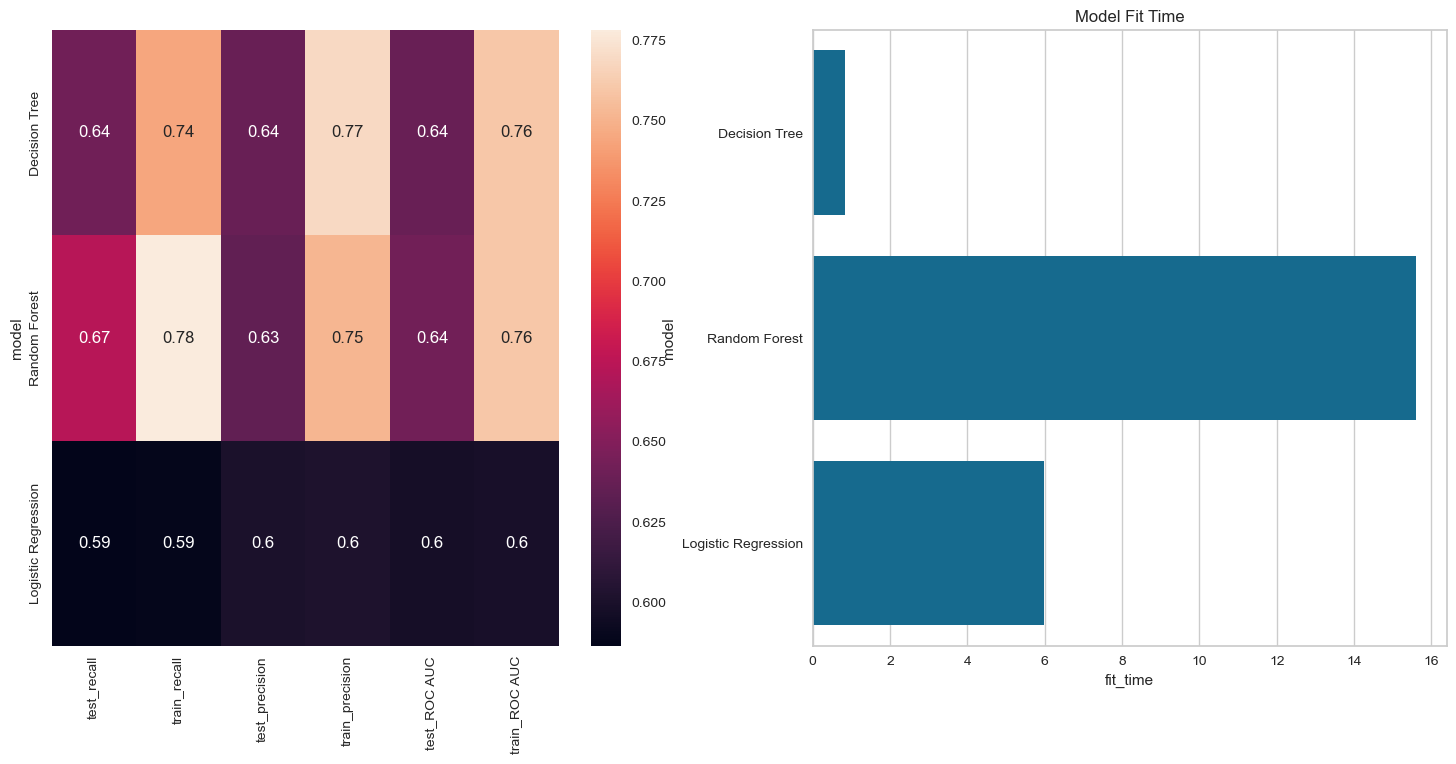

In [45]:
# Show model comparisson in a table / Visualization

fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.heatmap(data=model_scores_comparison.set_index('model'), annot=True, ax=ax[0])
sns.barplot(data=model_time_comparison, y='model', x='fit_time').set_title('Model Fit Time')

I'm selecting the Random Forest algorithm to tune the hyper parameters since it is the model with the best recall while having a similar ROC AUC and precision as the Decision Tree.

In [46]:
# Tuning the selected best model - Random Forest
from sklearn.model_selection import RandomizedSearchCV

parameters = {'n_estimators': np.arange(100,400,50),
              'criterion': ['gini', 'entropy'],
              'min_samples_split':[2,5,10,15]}

rfc_rand = RandomizedSearchCV(RandomForestClassifier(max_depth=12, n_jobs=-1),     # Original max depth was None
                              n_iter=50,
                              param_distributions=parameters,
                              return_train_score=True,
                              scoring='recall',
                              n_jobs=-1)

rfc_rand.fit(X=X_train, y=y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning:

The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(estimator=RandomForestClassifier(max_depth=12, n_jobs=-1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350])},
                   return_train_score=True, scoring='recall')

In [47]:
# Best hyper parameters
print('The best hyper parameters are:', rfc_rand.best_params_)

Los mejores hiperparámetrics son: {'n_estimators': 100, 'min_samples_split': 5, 'criterion': 'gini'}


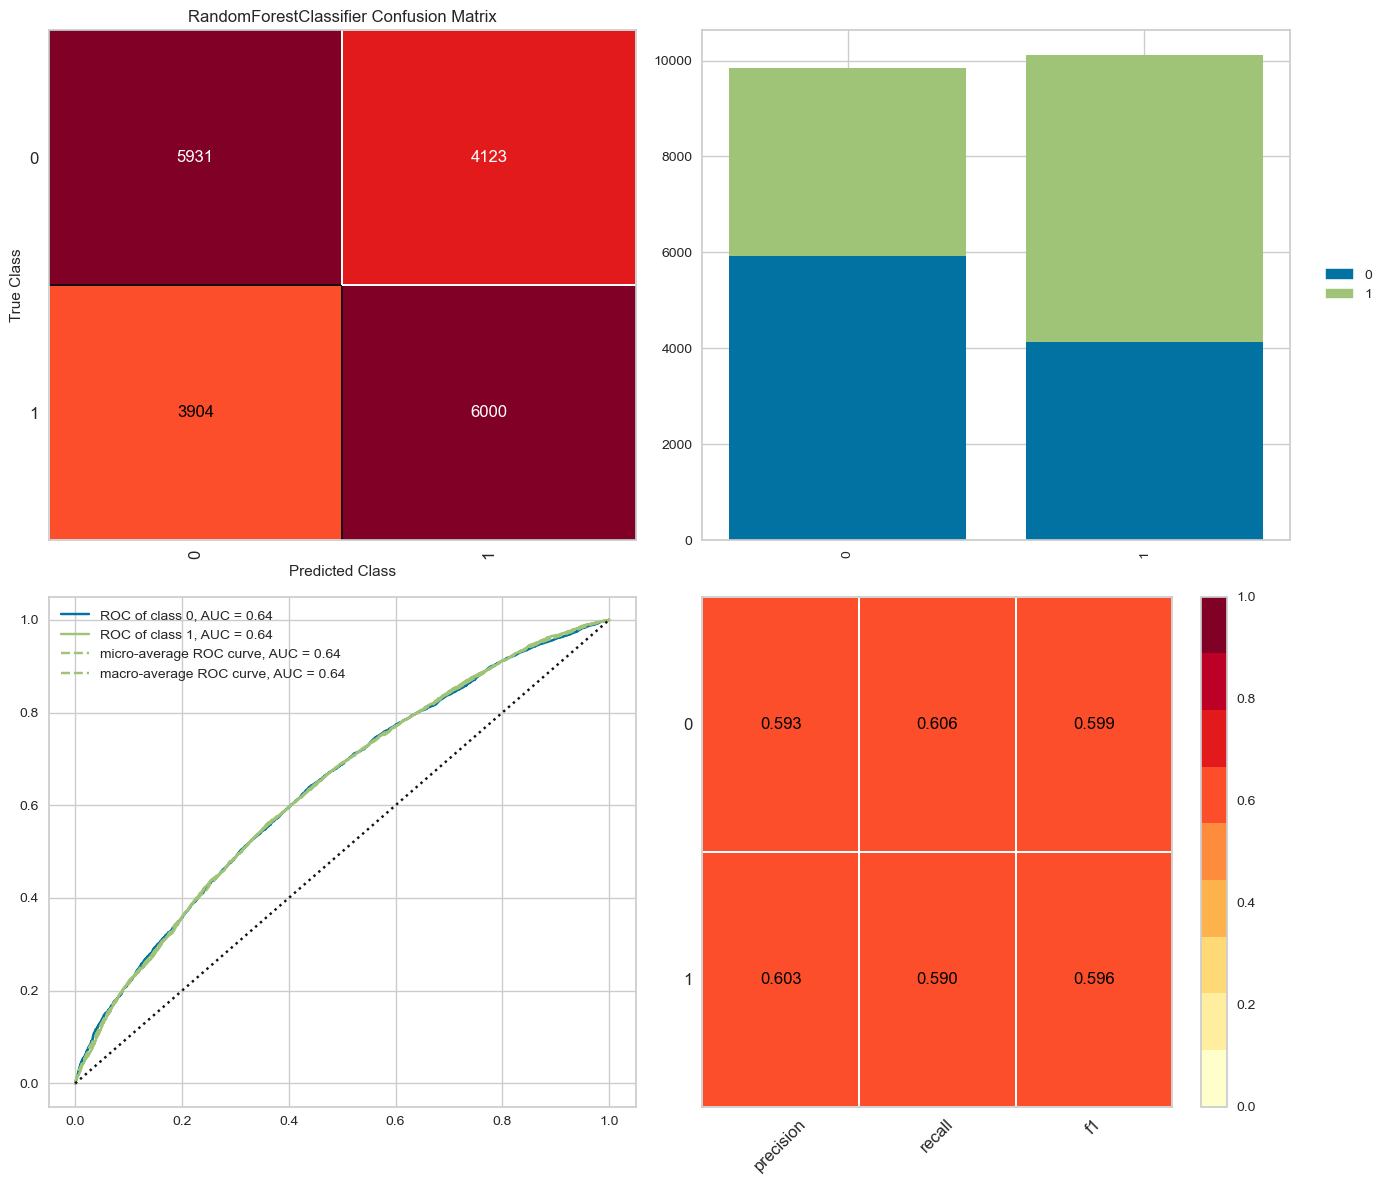

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

In [48]:
# Add the first tuned model to the comparisson table
best_model = rfc_rand.best_estimator_
scores, train_time = add_model_to_comparisson(best_model, 'Best Model RFC')

model_scores_comparison = pd.concat(objs=[model_scores_comparison, scores])
model_time_comparison = pd.concat(objs=[model_time_comparison, train_time])


rfc_tuned_model = rfc_rand.best_estimator_
visual_score_model(rfc_tuned_model)

In [49]:
model_scores_comparison

,model,test_recall,train_recall,test_precision,train_precision,test_ROC AUC,train_ROC AUC
0,Decision Tree,0.641510,0.743864,0.637807,0.769069,0.637924,0.759827
0,Random Forest,0.672968,0.778172,0.634497,0.751230,0.641906,0.759751
0,Logistic Regression,0.586347,0.588322,0.600194,0.601829,0.597139,0.598809
0,Best Model RFC,0.622406,0.645775,0.592354,0.614177,0.596143,0.619223


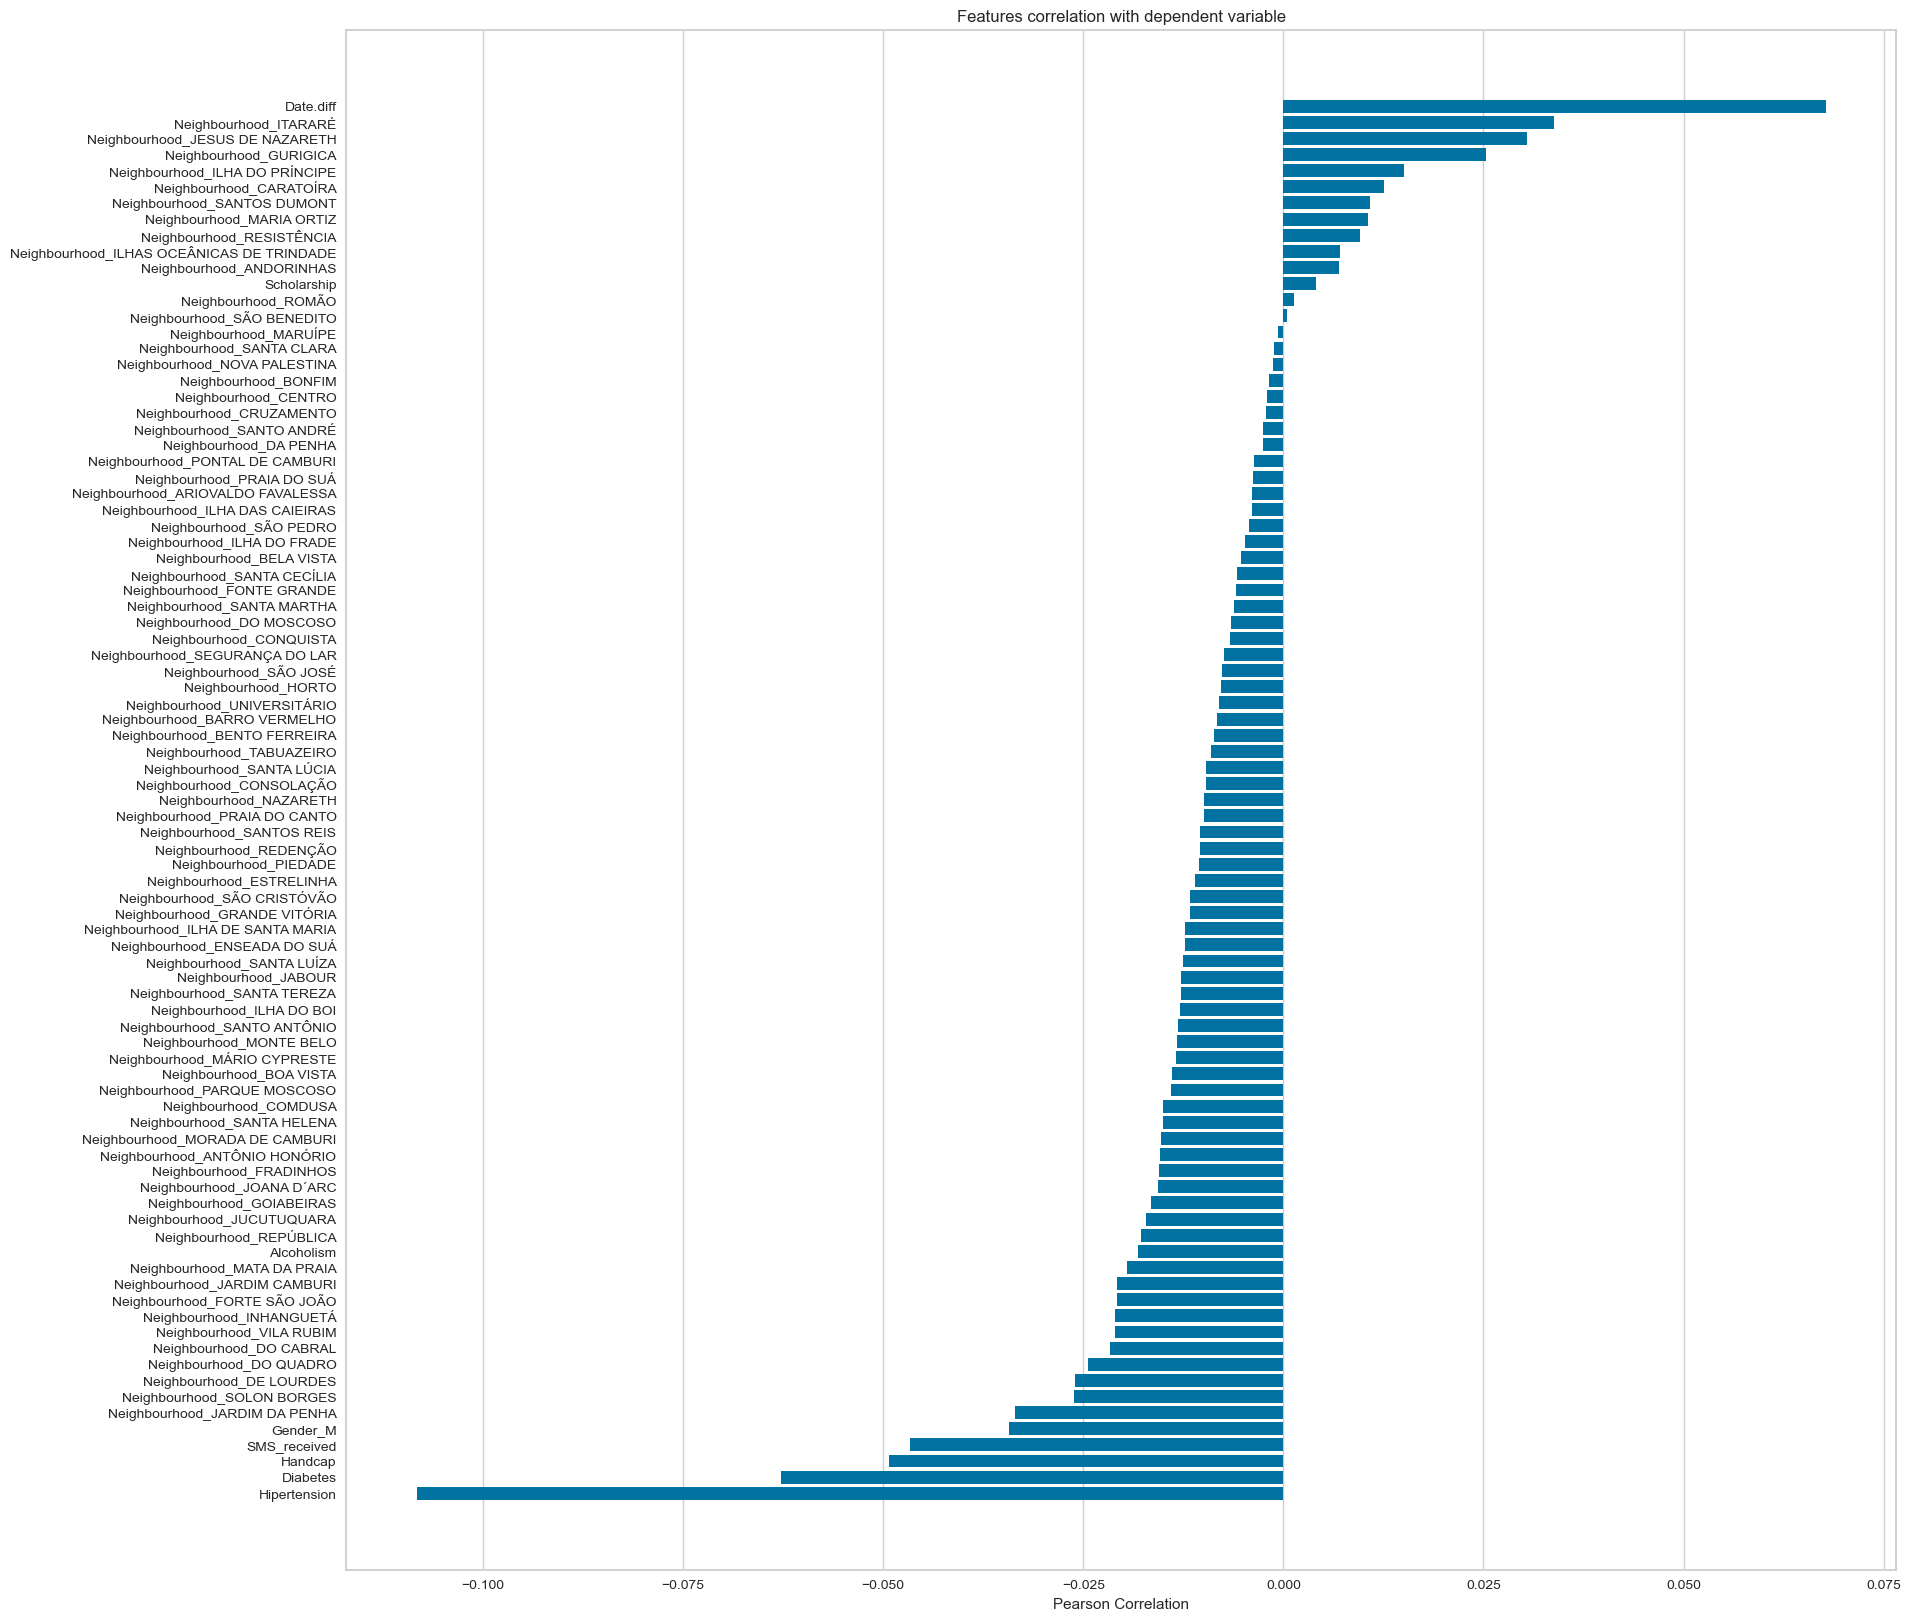

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [50]:
# Feature Correlation
from yellowbrick.target import FeatureCorrelation

labels = X_resampled_copy.columns

fig, ax = plt.subplots(figsize=(20,20))
viz = FeatureCorrelation(labels=labels, sort=True, ax=ax)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

**Insights:**
- RandomSearchCV was not able to find better hyperparameters from the default other than the number of estimators before starting to overfit. The best recall was 0.622 which is honestly pretty low.
- Given that all models had similar scores, I would return to the feature engineering phase to try a different approach.
- Most of the encoded neighborhood variables had a really low importance towards the response variable predition.

---

## Personal Correction after project delivery
After the original project delivery, I received feedback from the tutor and decided to implement to try to submit a better model before the grading deadline.

In [51]:
df_noshow

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff,Neighbourhood T10,no_show,day_of_week,holiday,age_category
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,True,2,Other,0,Friday,False,elder
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,False,2,Other,1,Friday,False,young adult
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,False,2,Other,1,Friday,False,young adult
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,True,2,Other,0,Friday,False,teen
10,7.345362e+14,5630213,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,False,False,False,False,False,False,True,2,NOVA PALESTINA,0,Friday,False,young adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35,MARIA ORTIZ,0,Tuesday,False,adult
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35,MARIA ORTIZ,0,Tuesday,False,adult
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41,MARIA ORTIZ,0,Tuesday,False,young adult
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41,MARIA ORTIZ,0,Tuesday,False,young adult


In [52]:
df_noshow_copy = df_noshow.copy()

# Clean dataset from variables that were deemed unnecesary in the last analysis.
df_noshow_copy.drop(columns=['PatientId', 'AppointmentID', 'holiday', 'Showed_up'], inplace=True)

In [10]:
# Separate numeric and categorical columns
num_cols = ['Age', 'Date.diff']
cat_cols = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

Pipeline definition:
- Start with df_noshow. This dataframe has already the feature engineering we want up until this point.
- Divide the dataframe in training and testing datasets.
- Use num_pipeline and cat_pipeline to transform, scale, normalize, encode as necessary.
- Use SMOTE in the training dataset.
- Train and test models.

In [55]:
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

cat_pipeline = Pipeline([
    ('one hot encoding', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# rfc_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('randomforestclassifier', RandomForestClassifier())
# ])

def smote(X, y, preprocessor=preprocessor):
    '''
    '''
    preprocessor.fit(X=X_train, y=y_train)
    X_transformed = pd.DataFrame(data=preprocessor.transform(X=X_train), columns=preprocessor.get_feature_names_out())
    X_resampled, y_resampled = SMOTE().fit_resample(X=X_transformed, y=y)
    return X_resampled, y_resampled

smote_transformer = FunctionTransformer(smote)

oversampling_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('SMOTE', smote_transformer)
])


In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_noshow_copy.loc[:, num_cols+cat_cols], df_noshow_copy['no_show'])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(52371, 9) (17457, 9) (52371,) (17457,)


In [57]:
preprocessor.fit(X=X_train, y=y_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age', 'Date.diff']),
                                ('cat',
                                 Pipeline(steps=[('one hot encoding',
                                                  OneHotEncoder())]),
                                 ['Gender', 'Scholarship', 'Hipertension',
                                  'Diabetes', 'Alcoholism', 'Handcap',
                                  'SMS_received'])])

In [58]:
X_train_resampled, y_train_resampled = smote(X=X_train, y=y_train, preprocessor=preprocessor)

In [59]:
from sklearn.model_selection import cross_validate

scoring = {'ROC AUC' : make_scorer(roc_auc_score), 
            'precision' : make_scorer(precision_score),
            'recall' : make_scorer(recall_score)}

def add_model_to_comparisson(model, model_name, X, y):
    '''
    '''
    scores = cross_validate(estimator=model,
                            X=X, 
                            y=y, 
                            cv=10, 
                            return_train_score=True, 
                            n_jobs=-1,
                            scoring=scoring)
        
    test_row_data = pd.DataFrame(data=[[model_name, scores['test_recall'].mean(), scores['train_recall'].mean(), scores['test_precision'].mean(), scores['train_precision'].mean(), scores['test_ROC AUC'].mean(), scores['train_ROC AUC'].mean()]],
                                columns=['model','test_recall', 'train_recall','test_precision', 'train_precision','test_ROC AUC', 'train_ROC AUC'])
    time_row_data = pd.DataFrame(data=[[model_name, scores['fit_time'].mean()]],
                                columns=['model', 'fit_time'])

    return test_row_data, time_row_data



In [60]:
rfc2 = RandomForestClassifier()

scores, train_time = add_model_to_comparisson(rfc2, 'Random Forest Classifier 2', X=X_train_resampled, y=y_train_resampled)

model_scores_comparison = pd.concat(objs=[model_scores_comparison, scores])
model_time_comparison = pd.concat(objs=[model_time_comparison, train_time])

model_scores_comparison

,model,test_recall,train_recall,test_precision,train_precision,test_ROC AUC,train_ROC AUC
0,Decision Tree,0.641510,0.743864,0.637807,0.769069,0.637924,0.759827
0,Random Forest,0.672968,0.778172,0.634497,0.751230,0.641906,0.759751
0,Logistic Regression,0.586347,0.588322,0.600194,0.601829,0.597139,0.598809
0,Best Model RFC,0.622406,0.645775,0.592354,0.614177,0.596143,0.619223
0,Random Forest Classifier 2,0.680359,0.829834,0.704053,0.868990,0.705744,0.852381


In [61]:
# I can see that the model is overfitting due to the difference between the trainig and testing scores
# I'll simplify the model with a predefined max_depth

rfc3 = RandomForestClassifier(max_depth=12)
rfc.fit(X=X_train_resampled, y=y_train_resampled)

scores, train_time = add_model_to_comparisson(rfc3, 'Random Forest Classifier 3', X=X_train_resampled, y=y_train_resampled)

model_scores_comparison = pd.concat(objs=[model_scores_comparison, scores])
model_time_comparison = pd.concat(objs=[model_time_comparison, train_time])

model_scores_comparison

,model,test_recall,train_recall,test_precision,train_precision,test_ROC AUC,train_ROC AUC
0,Decision Tree,0.641510,0.743864,0.637807,0.769069,0.637924,0.759827
0,Random Forest,0.672968,0.778172,0.634497,0.751230,0.641906,0.759751
0,Logistic Regression,0.586347,0.588322,0.600194,0.601829,0.597139,0.598809
0,Best Model RFC,0.622406,0.645775,0.592354,0.614177,0.596143,0.619223
0,Random Forest Classifier 2,0.680359,0.829834,0.704053,0.868990,0.705744,0.852381
0,Random Forest Classifier 3,0.653060,0.685649,0.625403,0.656559,0.632595,0.663498


In [62]:
def custom_pipeline(df, cat_cols, num_cols, target_col, preprocessor, model, model_name):
    '''

    '''
    # Train test split
    X = df.loc[:, cat_cols + num_cols]
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
    print('Split Done.')

    # fit preprocessor and get preprocessed X_test
    preprocessor.fit(X=X_train, y=y_train)
    print('Preprocessor Successful.')
    X_test = preprocessor.transform(X_test)
    print('X_test preprocessed.')

    # Smote to resample X_train and y_train
    # preprocessor.fit(X=X_train, y=y_train)
    X_transformed = pd.DataFrame(data=preprocessor.transform(X=X_train), columns=preprocessor.get_feature_names_out())
    X_train_resampled, y_train_resampled = SMOTE().fit_resample(X=X_transformed, y=y_train)


    # Run model with cross validation
    scores = cross_validate(estimator=model,
                            X=X_train_resampled, 
                            y=y_train_resampled, 
                            cv=10, 
                            return_train_score=True, 
                            n_jobs=-1,
                            scoring=scoring)
        
    test_recall = scores['test_recall'].mean()
    train_recall = scores['train_recall'].mean()
    test_precision = scores['test_precision'].mean()
    train_precision = scores['train_precision'].mean()
    test_roc_auc = scores['test_ROC AUC'].mean()
    train_roc_auc = scores['train_ROC AUC'].mean()

    # Add scores and fitting time to global Dataframes
    global model_scores_comparison  # It is not good practice to use global variables within functions
    global model_time_comparison

    test_row_data = pd.DataFrame(data=[[model_name, test_recall, train_recall, test_precision, train_precision, test_roc_auc, train_roc_auc]],
                                columns=['model','test_recall', 'train_recall','test_precision', 'train_precision','test_ROC AUC', 'train_ROC AUC'])
    
    model_scores_comparison = pd.concat([model_scores_comparison, test_row_data])
    model_scores_comparison.reset_index(drop=True, inplace=True)


    time_row_data = pd.DataFrame(data=[[model_name, scores['fit_time'].mean()]],
                                columns=['model', 'fit_time'])
    
    model_time_comparison = pd.concat([model_time_comparison, time_row_data])
    model_time_comparison.reset_index(drop=True, inplace=True)

In [63]:
custom_pipeline(df=df_noshow_copy, 
                cat_cols=cat_cols,
                num_cols=num_cols,
                target_col='no_show', 
                preprocessor=preprocessor,
                model=rfc3, 
                model_name='RandomForestClassifier3_custom pipeline')

Split Done.
Preprocessor Successful.
X_test preprocessed.


In [64]:
# Add Neighborhood, do not normalizes numeric columns
num_cols = ['Age', 'Date.diff']
cat_cols = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Neighbourhood']

custom_pipeline(df=df_noshow_copy, 
                cat_cols=cat_cols,
                num_cols=num_cols,
                target_col='no_show', 
                preprocessor=preprocessor, 
                model=rfc3, 
                model_name='RandomForestClassifier4_custom pipeline')

model_scores_comparison

Split Done.
Preprocessor Successful.
X_test preprocessed.


,model,test_recall,train_recall,test_precision,train_precision,test_ROC AUC,train_ROC AUC
0,Decision Tree,0.641510,0.743864,0.637807,0.769069,0.637924,0.759827
1,Random Forest,0.672968,0.778172,0.634497,0.751230,0.641906,0.759751
2,Logistic Regression,0.586347,0.588322,0.600194,0.601829,0.597139,0.598809
3,Best Model RFC,0.622406,0.645775,0.592354,0.614177,0.596143,0.619223
4,Random Forest Classifier 2,0.680359,0.829834,0.704053,0.868990,0.705744,0.852381
5,Random Forest Classifier 3,0.653060,0.685649,0.625403,0.656559,0.632595,0.663498
6,RandomForestClassifier3_custom pipeline,0.662073,0.695262,0.624509,0.655457,0.633425,0.664899
7,RandomForestClassifier4_custom pipeline,0.662561,0.693474,0.620143,0.648198,0.629692,0.658540


Adding neighborhood back in improves the model a little

In [65]:
# Try using a support vector machine model without the neighborhood variable

from sklearn.svm import SVC

svc = SVC(C=0.5)

num_cols = ['Age', 'Date.diff']
cat_cols = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

custom_pipeline(df=df_noshow_copy, 
                cat_cols=cat_cols,
                num_cols=num_cols,
                target_col='no_show', 
                preprocessor=preprocessor, 
                model=svc, 
                model_name='SVC_custom pipeline')

model_scores_comparison

Split Done.
Preprocessor Successful.
X_test preprocessed.


,model,test_recall,train_recall,test_precision,train_precision,test_ROC AUC,train_ROC AUC
0,Decision Tree,0.641510,0.743864,0.637807,0.769069,0.637924,0.759827
1,Random Forest,0.672968,0.778172,0.634497,0.751230,0.641906,0.759751
2,Logistic Regression,0.586347,0.588322,0.600194,0.601829,0.597139,0.598809
3,Best Model RFC,0.622406,0.645775,0.592354,0.614177,0.596143,0.619223
4,Random Forest Classifier 2,0.680359,0.829834,0.704053,0.868990,0.705744,0.852381
5,Random Forest Classifier 3,0.653060,0.685649,0.625403,0.656559,0.632595,0.663498
6,RandomForestClassifier3_custom pipeline,0.662073,0.695262,0.624509,0.655457,0.633425,0.664899
7,RandomForestClassifier4_custom pipeline,0.662561,0.693474,0.620143,0.648198,0.629692,0.658540
8,SVC_custom pipeline,0.628806,0.629532,0.557473,0.558210,0.564804,0.565647


The SVM classifier did not improve any score. Let us try changing the components in the pipeline

In [66]:
from sklearn.preprocessing import StandardScaler

num_pipeline2 = Pipeline([
    ('Standard Scaler', StandardScaler())
])

preprocessor2 = ColumnTransformer([
    ('Num Pipeline', num_pipeline2, num_cols),
    ('Cat Pipeline', cat_pipeline, cat_cols)
])

num_cols = ['Age', 'Date.diff']
cat_cols = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Neighbourhood']

custom_pipeline(df=df_noshow_copy, 
                cat_cols=cat_cols,
                num_cols=num_cols,
                target_col='no_show', 
                preprocessor=preprocessor2, 
                model=rfc3, 
                model_name='RFC3_custom pipeline_StandardScaler')

model_scores_comparison

Split Done.
Preprocessor Successful.
X_test preprocessed.


,model,test_recall,train_recall,test_precision,train_precision,test_ROC AUC,train_ROC AUC
0,Decision Tree,0.641510,0.743864,0.637807,0.769069,0.637924,0.759827
1,Random Forest,0.672968,0.778172,0.634497,0.751230,0.641906,0.759751
2,Logistic Regression,0.586347,0.588322,0.600194,0.601829,0.597139,0.598809
3,Best Model RFC,0.622406,0.645775,0.592354,0.614177,0.596143,0.619223
4,Random Forest Classifier 2,0.680359,0.829834,0.704053,0.868990,0.705744,0.852381
5,Random Forest Classifier 3,0.653060,0.685649,0.625403,0.656559,0.632595,0.663498
6,RandomForestClassifier3_custom pipeline,0.662073,0.695262,0.624509,0.655457,0.633425,0.664899
7,RandomForestClassifier4_custom pipeline,0.662561,0.693474,0.620143,0.648198,0.629692,0.658540
8,SVC_custom pipeline,0.628806,0.629532,0.557473,0.558210,0.564804,0.565647
9,RFC3_custom pipeline_StandardScaler,0.656913,0.688532,0.617900,0.646659,0.626315,0.656138


In [67]:
model_time_comparison

,model,fit_time
0,Decision Tree,0.833296
1,Random Forest,15.613990
2,Logistic Regression,5.974280
3,Best Model RFC,4.834813
4,Random Forest Classifier 2,6.021380
5,Random Forest Classifier 3,3.236591
6,RandomForestClassifier3_custom pipeline,3.666024
7,RandomForestClassifier4_custom pipeline,3.618215
8,SVC_custom pipeline,177.416374
9,RFC3_custom pipeline_StandardScaler,3.522442


In [68]:
df_noshow_copy

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Date.diff,Neighbourhood T10,no_show,day_of_week,age_category
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,2,Other,0,Friday,elder
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,2,Other,1,Friday,young adult
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,2,Other,1,Friday,young adult
9,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,2,Other,0,Friday,teen
10,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,False,False,False,False,False,False,2,NOVA PALESTINA,0,Friday,young adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,35,MARIA ORTIZ,0,Tuesday,adult
106983,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,35,MARIA ORTIZ,0,Tuesday,adult
106984,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,41,MARIA ORTIZ,0,Tuesday,young adult
106985,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,41,MARIA ORTIZ,0,Tuesday,young adult


In [69]:
import datetime

dates_after_holiday = [datetime.datetime.combine(date + datetime.timedelta(days=1), datetime.time(0)) for date in holidays_br.keys()]
dates_before_holiday = [datetime.datetime.combine(date + datetime.timedelta(days=-1), datetime.time(0)) for date in holidays_br.keys()]

df_noshow_copy['date_after_holiday'] = df_noshow_copy['AppointmentDay'].apply(lambda x: x in dates_after_holiday)
df_noshow_copy['date_before_holiday'] = df_noshow_copy['AppointmentDay'].apply(lambda x: x in dates_before_holiday)

df_noshow_copy[['date_after_holiday', 'date_before_holiday']].value_counts()

date_after_holiday  date_before_holiday
False               False                  67135
True                False                   2693
Name: count, dtype: int64

In [70]:
df_noshow_copy

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Date.diff,Neighbourhood T10,no_show,day_of_week,age_category,date_after_holiday,date_before_holiday
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,2,Other,0,Friday,elder,False,False
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,2,Other,1,Friday,young adult,False,False
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,2,Other,1,Friday,young adult,False,False
9,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,2,Other,0,Friday,teen,False,False
10,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,False,False,False,False,False,False,2,NOVA PALESTINA,0,Friday,young adult,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,35,MARIA ORTIZ,0,Tuesday,adult,False,False
106983,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,35,MARIA ORTIZ,0,Tuesday,adult,False,False
106984,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,41,MARIA ORTIZ,0,Tuesday,young adult,False,False
106985,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,41,MARIA ORTIZ,0,Tuesday,young adult,False,False


In [71]:
num_cols = ['Date.diff']
cat_cols = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Neighbourhood', 'age_category', 'date_after_holiday']
model = RandomForestClassifier(max_depth=12)
model_name = 'RFC_agecategory_dateafterholiday_maxdepth12'

# Split X and y
X = df_noshow_copy.loc[:, num_cols + cat_cols]
y = df_noshow_copy['no_show']

# categorical pipeline === X_categorical
X_categorical = pd.get_dummies(X[cat_cols],dtype=int,columns=cat_cols, drop_first=True).reset_index(drop=True)

# numerical pipeline === X_numerical
scaler = MinMaxScaler()
scaler.fit(X=X[num_cols])
X_numerical = scaler.transform(X=X[num_cols])
X_numerical = pd.DataFrame(X_numerical, columns=scaler.get_feature_names_out()).reset_index(drop=True)

# Merge numerical and categorical in one df === X
X = pd.merge(left=X_numerical, right=X_categorical, left_index=True, right_index=True)

# Train-Test Split === X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Data split.')

# SMOTE === X_train_resampled, y_train_resampled
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X=X_train, y=y_train)
print('SMOTE done.')
print(X_train_resampled.shape, X_test.shape, y_train_resampled.shape, y_test.shape)

# Cross Validate === Scores y tiempo agregado a comparaciones
scores = cross_validate(estimator=model,
                        X=X_train_resampled, 
                        y=y_train_resampled, 
                        cv=5, 
                        return_train_score=True, 
                        n_jobs=-1,
                        scoring=scoring)

print('Cross Validation done.')

test_recall = scores['test_recall'].mean()
train_recall = scores['train_recall'].mean()
test_precision = scores['test_precision'].mean()
train_precision = scores['train_precision'].mean()
test_roc_auc = scores['test_ROC AUC'].mean()
train_roc_auc = scores['train_ROC AUC'].mean()


comparison_row_data = pd.DataFrame(data=[[model_name, test_recall, train_recall, test_precision, train_precision, test_roc_auc, train_roc_auc]],
                            columns=['model','test_recall', 'train_recall','test_precision', 'train_precision','test_ROC AUC', 'train_ROC AUC'])

model_scores_comparison = pd.concat([model_scores_comparison, comparison_row_data])
model_scores_comparison.reset_index(drop=True, inplace=True)


time_row_data = pd.DataFrame(data=[[model_name, scores['fit_time'].mean()]],
                            columns=['model', 'fit_time'])

model_time_comparison = pd.concat([model_time_comparison, time_row_data])
model_time_comparison.reset_index(drop=True, inplace=True)

print('Scores added to comparison')

Data split.
SMOTE done.
(79894, 92) (13966, 92) (79894,) (13966,)
Cross Validation done.
Scores added to comparison


In [72]:
model_scores_comparison

,model,test_recall,train_recall,test_precision,train_precision,test_ROC AUC,train_ROC AUC
0,Decision Tree,0.641510,0.743864,0.637807,0.769069,0.637924,0.759827
1,Random Forest,0.672968,0.778172,0.634497,0.751230,0.641906,0.759751
2,Logistic Regression,0.586347,0.588322,0.600194,0.601829,0.597139,0.598809
3,Best Model RFC,0.622406,0.645775,0.592354,0.614177,0.596143,0.619223
4,Random Forest Classifier 2,0.680359,0.829834,0.704053,0.868990,0.705744,0.852381
5,Random Forest Classifier 3,0.653060,0.685649,0.625403,0.656559,0.632595,0.663498
6,RandomForestClassifier3_custom pipeline,0.662073,0.695262,0.624509,0.655457,0.633425,0.664899
7,RandomForestClassifier4_custom pipeline,0.662561,0.693474,0.620143,0.648198,0.629692,0.658540
8,SVC_custom pipeline,0.628806,0.629532,0.557473,0.558210,0.564804,0.565647
9,RFC3_custom pipeline_StandardScaler,0.656913,0.688532,0.617900,0.646659,0.626315,0.656138


In [73]:
df_noshow_copy

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Date.diff,Neighbourhood T10,no_show,day_of_week,age_category,date_after_holiday,date_before_holiday
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,2,Other,0,Friday,elder,False,False
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,2,Other,1,Friday,young adult,False,False
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,2,Other,1,Friday,young adult,False,False
9,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,2,Other,0,Friday,teen,False,False
10,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,False,False,False,False,False,False,2,NOVA PALESTINA,0,Friday,young adult,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,35,MARIA ORTIZ,0,Tuesday,adult,False,False
106983,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,35,MARIA ORTIZ,0,Tuesday,adult,False,False
106984,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,41,MARIA ORTIZ,0,Tuesday,young adult,False,False
106985,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,41,MARIA ORTIZ,0,Tuesday,young adult,False,False


In [74]:
num_cols = ['Date.diff']
cat_cols = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Neighbourhood', 'age_category', 'date_after_holiday', 'day_of_week']
model = RandomForestClassifier(max_depth=12)
model_name = 'RFC_agecategory_dateafterholiday_dayofweek_maxdepth12'

# Split X and y === X, y
X = df_noshow_copy.loc[:, num_cols + cat_cols]
y = df_noshow_copy['no_show']

# Categorical pipeline === X_categorical
X_categorical = pd.get_dummies(X[cat_cols],dtype=int,columns=cat_cols, drop_first=True).reset_index(drop=True)

# Numerical pipeline === X_numerical
scaler = MinMaxScaler()
scaler.fit(X=X[num_cols])
X_numerical = scaler.transform(X=X[num_cols])
X_numerical = pd.DataFrame(X_numerical, columns=scaler.get_feature_names_out()).reset_index(drop=True)

# Joine numerical and categorical in a single df === X
X = pd.merge(left=X_numerical, right=X_categorical, left_index=True, right_index=True)

# Train-Test Split === X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Data split.')

# SMOTE === X_train_resampled, y_train_resampled
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X=X_train, y=y_train)
print('SMOTE done.')
print(X_train_resampled.shape, X_test.shape, y_train_resampled.shape, y_test.shape)

# Cross Validate === Scores y tiempo agregado a comparaciones
scores = cross_validate(estimator=model,
                        X=X_train_resampled, 
                        y=y_train_resampled, 
                        cv=5, 
                        return_train_score=True, 
                        n_jobs=-1,
                        scoring=scoring)

print('Cross Validation done.')

test_recall = scores['test_recall'].mean()
train_recall = scores['train_recall'].mean()
test_precision = scores['test_precision'].mean()
train_precision = scores['train_precision'].mean()
test_roc_auc = scores['test_ROC AUC'].mean()
train_roc_auc = scores['train_ROC AUC'].mean()


comparison_row_data = pd.DataFrame(data=[[model_name, test_recall, train_recall, test_precision, train_precision, test_roc_auc, train_roc_auc]],
                            columns=['model','test_recall', 'train_recall','test_precision', 'train_precision','test_ROC AUC', 'train_ROC AUC'])

model_scores_comparison = pd.concat([model_scores_comparison, comparison_row_data])
model_scores_comparison.reset_index(drop=True, inplace=True)


time_row_data = pd.DataFrame(data=[[model_name, scores['fit_time'].mean()]],
                            columns=['model', 'fit_time'])

model_time_comparison = pd.concat([model_time_comparison, time_row_data])
model_time_comparison.reset_index(drop=True, inplace=True)

print('Scores added to comparison')

Data split.
SMOTE done.
(79848, 97) (13966, 97) (79848,) (13966,)
Cross Validation done.
Scores added to comparison


In [75]:
model_scores_comparison

,model,test_recall,train_recall,test_precision,train_precision,test_ROC AUC,train_ROC AUC
0,Decision Tree,0.641510,0.743864,0.637807,0.769069,0.637924,0.759827
1,Random Forest,0.672968,0.778172,0.634497,0.751230,0.641906,0.759751
2,Logistic Regression,0.586347,0.588322,0.600194,0.601829,0.597139,0.598809
3,Best Model RFC,0.622406,0.645775,0.592354,0.614177,0.596143,0.619223
4,Random Forest Classifier 2,0.680359,0.829834,0.704053,0.868990,0.705744,0.852381
5,Random Forest Classifier 3,0.653060,0.685649,0.625403,0.656559,0.632595,0.663498
6,RandomForestClassifier3_custom pipeline,0.662073,0.695262,0.624509,0.655457,0.633425,0.664899
7,RandomForestClassifier4_custom pipeline,0.662561,0.693474,0.620143,0.648198,0.629692,0.658540
8,SVC_custom pipeline,0.628806,0.629532,0.557473,0.558210,0.564804,0.565647
9,RFC3_custom pipeline_StandardScaler,0.656913,0.688532,0.617900,0.646659,0.626315,0.656138


In [76]:
from sklearn.ensemble import GradientBoostingClassifier

num_cols = ['Date.diff']
cat_cols = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Neighbourhood', 'age_category', 'date_after_holiday', 'day_of_week']
model = GradientBoostingClassifier()
model_name = 'GradientBoostingClassifier'

# Split X and y === X, y
X = df_noshow_copy.loc[:, num_cols + cat_cols]
y = df_noshow_copy['no_show']

# Categorical pipeline === X_categorical
X_categorical = pd.get_dummies(X[cat_cols],dtype=int,columns=cat_cols, drop_first=True).reset_index(drop=True)

# Numerical pipeline === X_numerical
scaler = MinMaxScaler()
scaler.fit(X=X[num_cols])
X_numerical = scaler.transform(X=X[num_cols])
X_numerical = pd.DataFrame(X_numerical, columns=scaler.get_feature_names_out()).reset_index(drop=True)

# Join numerical and categorical in a single df === X
X = pd.merge(left=X_numerical, right=X_categorical, left_index=True, right_index=True)

# Train-Test Split === X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Data split.')

# SMOTE === X_train_resampled, y_train_resampled
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X=X_train, y=y_train)
print('SMOTE done.')
print(X_train_resampled.shape, X_test.shape, y_train_resampled.shape, y_test.shape)

# Cross Validate === Scores y tiempo agregado a comparaciones
scores = cross_validate(estimator=model,
                        X=X_train_resampled, 
                        y=y_train_resampled, 
                        cv=5, 
                        return_train_score=True, 
                        n_jobs=-1,
                        scoring=scoring)

print('Cross Validation done.')

test_recall = scores['test_recall'].mean()
train_recall = scores['train_recall'].mean()
test_precision = scores['test_precision'].mean()
train_precision = scores['train_precision'].mean()
test_roc_auc = scores['test_ROC AUC'].mean()
train_roc_auc = scores['train_ROC AUC'].mean()


comparison_row_data = pd.DataFrame(data=[[model_name, test_recall, train_recall, test_precision, train_precision, test_roc_auc, train_roc_auc]],
                            columns=['model','test_recall', 'train_recall','test_precision', 'train_precision','test_ROC AUC', 'train_ROC AUC'])

model_scores_comparison = pd.concat([model_scores_comparison, comparison_row_data])
model_scores_comparison.reset_index(drop=True, inplace=True)


time_row_data = pd.DataFrame(data=[[model_name, scores['fit_time'].mean()]],
                            columns=['model', 'fit_time'])

model_time_comparison = pd.concat([model_time_comparison, time_row_data])
model_time_comparison.reset_index(drop=True, inplace=True)

print('Scores added to comparison')

Data split.
SMOTE done.
(79698, 97) (13966, 97) (79698,) (13966,)
Cross Validation done.
Scores added to comparison


In [77]:
model_scores_comparison

,model,test_recall,train_recall,test_precision,train_precision,test_ROC AUC,train_ROC AUC
0,Decision Tree,0.641510,0.743864,0.637807,0.769069,0.637924,0.759827
1,Random Forest,0.672968,0.778172,0.634497,0.751230,0.641906,0.759751
2,Logistic Regression,0.586347,0.588322,0.600194,0.601829,0.597139,0.598809
3,Best Model RFC,0.622406,0.645775,0.592354,0.614177,0.596143,0.619223
4,Random Forest Classifier 2,0.680359,0.829834,0.704053,0.868990,0.705744,0.852381
5,Random Forest Classifier 3,0.653060,0.685649,0.625403,0.656559,0.632595,0.663498
6,RandomForestClassifier3_custom pipeline,0.662073,0.695262,0.624509,0.655457,0.633425,0.664899
7,RandomForestClassifier4_custom pipeline,0.662561,0.693474,0.620143,0.648198,0.629692,0.658540
8,SVC_custom pipeline,0.628806,0.629532,0.557473,0.558210,0.564804,0.565647
9,RFC3_custom pipeline_StandardScaler,0.656913,0.688532,0.617900,0.646659,0.626315,0.656138


In [100]:
transformer = PowerTransformer(method='box-cox', standardize=True)
df_noshow_copy['date.dif_norm'] = np.log(df_noshow_copy['Date.diff'])

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

num_cols = ['date.dif_norm']
cat_cols = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Neighbourhood', 'age_category', 'date_after_holiday', 'day_of_week']
model = GradientBoostingClassifier()
model_name = 'GradientBoostingClassifier_datediffNormalized'

# Split X and y === X, y
X = df_noshow_copy.loc[:, num_cols + cat_cols]
y = df_noshow_copy['no_show']

# Categorical pipeline === X_categorical
X_categorical = pd.get_dummies(X[cat_cols],dtype=int,columns=cat_cols, drop_first=True).reset_index(drop=True)

# Numerical pipeline === X_numerical
scaler = MinMaxScaler()
scaler.fit(X=X[num_cols])
X_numerical = scaler.transform(X=X[num_cols])
X_numerical = pd.DataFrame(X_numerical, columns=scaler.get_feature_names_out()).reset_index(drop=True)

# Join numerical and categorical in a single df === X
X = pd.merge(left=X_numerical, right=X_categorical, left_index=True, right_index=True)

# Train-Test Split === X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Data split.')

# SMOTE === X_train_resampled, y_train_resampled
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X=X_train, y=y_train)
print('SMOTE done.')
print(X_train_resampled.shape, X_test.shape, y_train_resampled.shape, y_test.shape)

# Cross Validate === Scores y tiempo agregado a comparaciones
scores = cross_validate(estimator=model,
                        X=X_train_resampled, 
                        y=y_train_resampled, 
                        cv=5, 
                        return_train_score=True, 
                        n_jobs=-1,
                        scoring=scoring)

print('Cross Validation done.')

test_recall = scores['test_recall'].mean()
train_recall = scores['train_recall'].mean()
test_precision = scores['test_precision'].mean()
train_precision = scores['train_precision'].mean()
test_roc_auc = scores['test_ROC AUC'].mean()
train_roc_auc = scores['train_ROC AUC'].mean()


comparison_row_data = pd.DataFrame(data=[[model_name, test_recall, train_recall, test_precision, train_precision, test_roc_auc, train_roc_auc]],
                            columns=['model','test_recall', 'train_recall','test_precision', 'train_precision','test_ROC AUC', 'train_ROC AUC'])

model_scores_comparison = pd.concat([model_scores_comparison, comparison_row_data])
model_scores_comparison.reset_index(drop=True, inplace=True)


time_row_data = pd.DataFrame(data=[[model_name, scores['fit_time'].mean()]],
                            columns=['model', 'fit_time'])

model_time_comparison = pd.concat([model_time_comparison, time_row_data])
model_time_comparison.reset_index(drop=True, inplace=True)

print('Scores added to comparison')

Data split.
SMOTE done.
(79800, 97) (13966, 97) (79800,) (13966,)
Cross Validation done.
Scores added to comparison


In [109]:
model_scores_comparison

,model,test_recall,train_recall,test_precision,train_precision,test_ROC AUC,train_ROC AUC
0,Decision Tree,0.641510,0.743864,0.637807,0.769069,0.637924,0.759827
1,Random Forest,0.672968,0.778172,0.634497,0.751230,0.641906,0.759751
2,Logistic Regression,0.586347,0.588322,0.600194,0.601829,0.597139,0.598809
3,Best Model RFC,0.622406,0.645775,0.592354,0.614177,0.596143,0.619223
4,Random Forest Classifier 2,0.680359,0.829834,0.704053,0.868990,0.705744,0.852381
5,Random Forest Classifier 3,0.653060,0.685649,0.625403,0.656559,0.632595,0.663498
6,RandomForestClassifier3_custom pipeline,0.662073,0.695262,0.624509,0.655457,0.633425,0.664899
7,RandomForestClassifier4_custom pipeline,0.662561,0.693474,0.620143,0.648198,0.629692,0.658540
8,SVC_custom pipeline,0.628806,0.629532,0.557473,0.558210,0.564804,0.565647
9,RFC3_custom pipeline_StandardScaler,0.656913,0.688532,0.617900,0.646659,0.626315,0.656138


**Insights**
- 
---

## Takeaways, conclusions and interpretations
1. If this dataset is representative of the whole population of appointments, the company would have a serious no show problem. Losing 3 out of every ten appointments would leave a lot of room for improvement and may become if it is not already a financial issue.
2. With the tried features, models and hyperparameters, the best recall score we could get was aroung 0.66. Which is honestly pretty low still. only catching two thirds of the real no shows is still low.
3. So far, the chosen ML algrythm, parameter tuning and whether to include or not neighborhood as is has not made a significant difference.

## Next steps
1. If percent of no shows in the dataset is representative of the usual behavior of the population of appointments, I would suggest the company to take immediate action with a contingency plan like calling patients for appointment confirmation.
2. Regarding the ML model. I would try the next following approaches:
    - Go back to the process of feature engineering an try a different approach like transforming variables in a different way or changing the way the binning is done.
    - I would try to enrich the dataset with external sources. A big contender would be to add more information based on the neighborhood such as population or socioeconomical factors.
    - If I had access to more detailes information, I would try to use data related to the patient or derived from patient information such as the number of days since last visit or the distance from their address to where the appointment was.